In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn import mixture

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import numpy as np

from scipy import linalg
from scipy.linalg import pinv
import scipy.stats 

import itertools

# K Means and GMM on PCA

## Heart Failure

In [2]:
%store -r best_hf_pca
%store -r Y_hf_train

### K Means Results

In [5]:
kmeans = KMeans(n_clusters=5, random_state=3169)
kmeans.fit(best_hf_pca)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_hf_pca, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_hf_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_hf_pca)

K-Means Inertia:  535951.739938209
K-Means Silhouette score:  0.314985915143216
K-Means Adjusted Mutual Information (AMI) score:  0.07120322979215102



array([[142.98444349,  12.88001159,  95.6682132 ,  45.84086905,
         63.26907699],
       [ 63.21628218,  89.88652195,  34.41871079,  62.19930427,
         24.79681384],
       [152.31700024,  56.0110461 ,  99.41847892,  43.5882397 ,
         86.58167125],
       ...,
       [114.16684096,  44.79127538,  65.11832215,  25.34162361,
         42.1079644 ],
       [108.09375671,  64.49661709,  54.58159242,  13.86483227,
         50.2067187 ],
       [ 60.65426156, 100.32344837,  24.26443774,  62.01917135,
         41.45402122]])

### Inertia Analysis

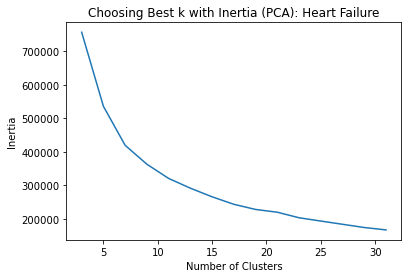

In [29]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_hf_pca)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (PCA): Heart Failure')
plt.savefig('inertia_hf_pca.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.36338375953725593
For n_clusters =  5 The average silhouette_score is : 0.3149392817265534
For n_clusters =  7 The average silhouette_score is : 0.2831869318392222
For n_clusters =  9 The average silhouette_score is : 0.26502369219061356
For n_clusters =  11 The average silhouette_score is : 0.23867060277927338
For n_clusters =  13 The average silhouette_score is : 0.2345727018851494
For n_clusters =  15 The average silhouette_score is : 0.23179223158210774


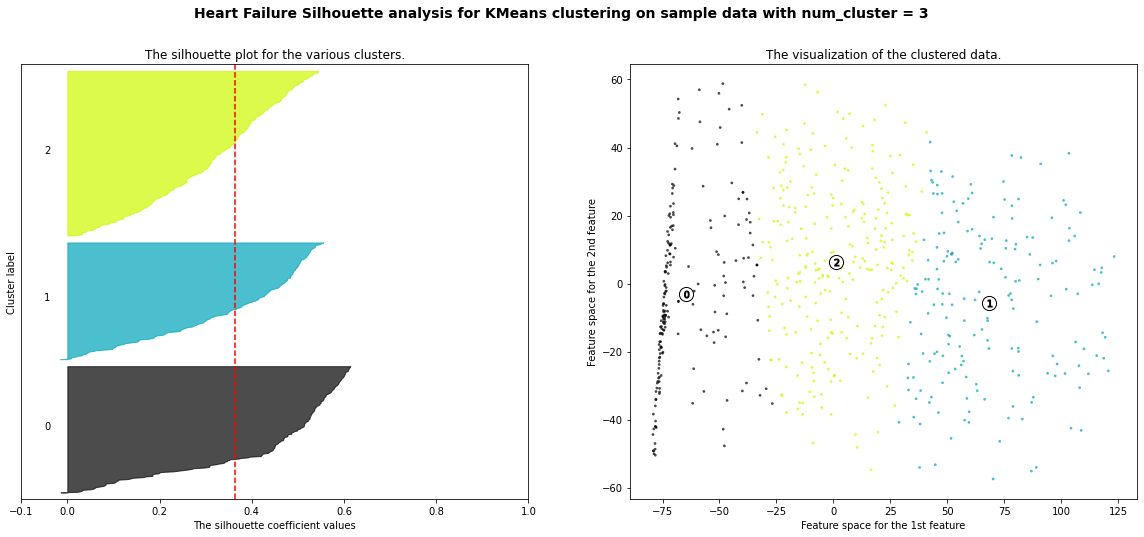

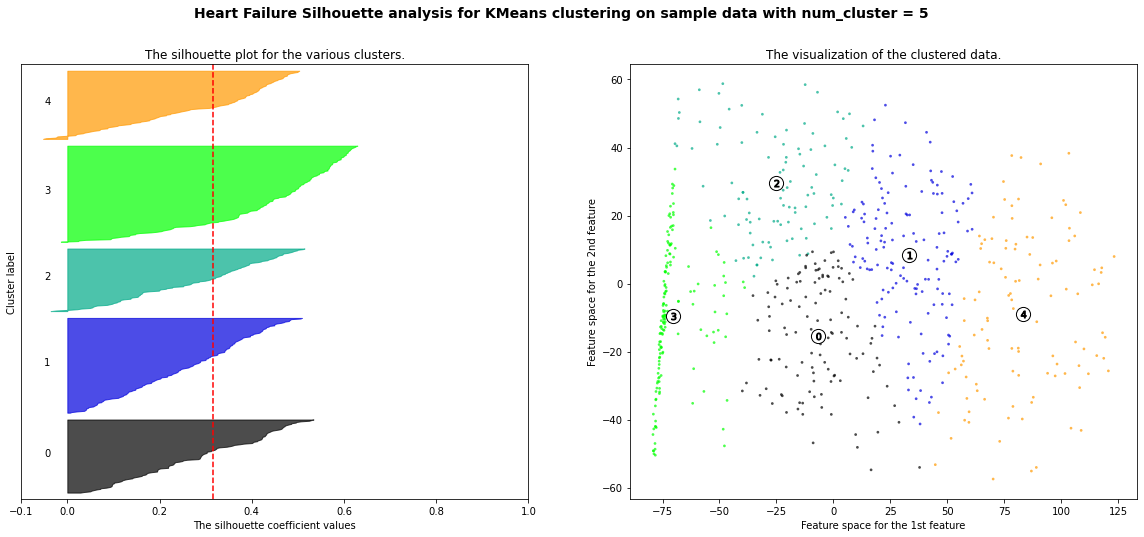

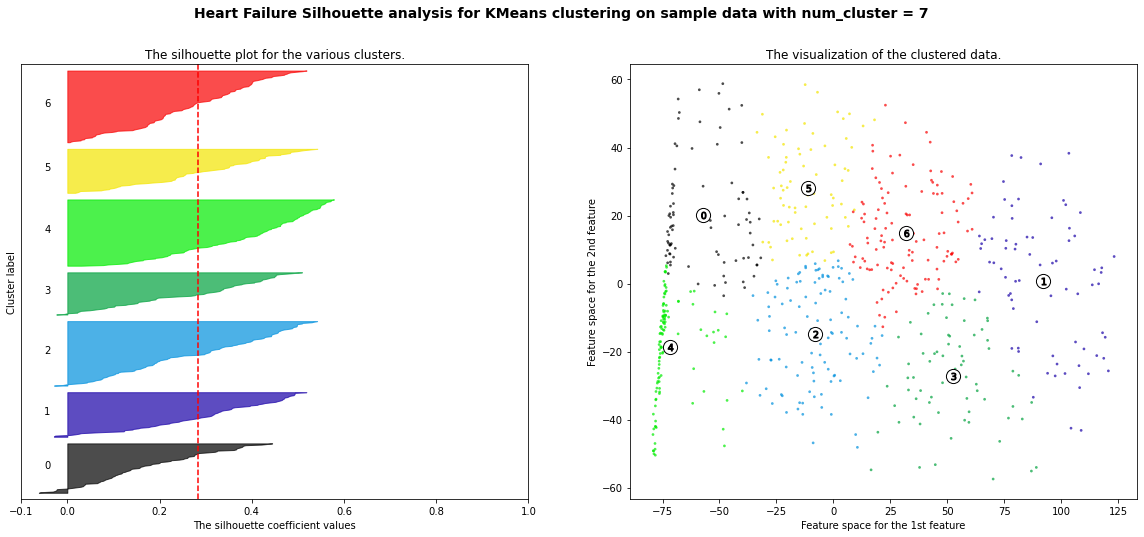

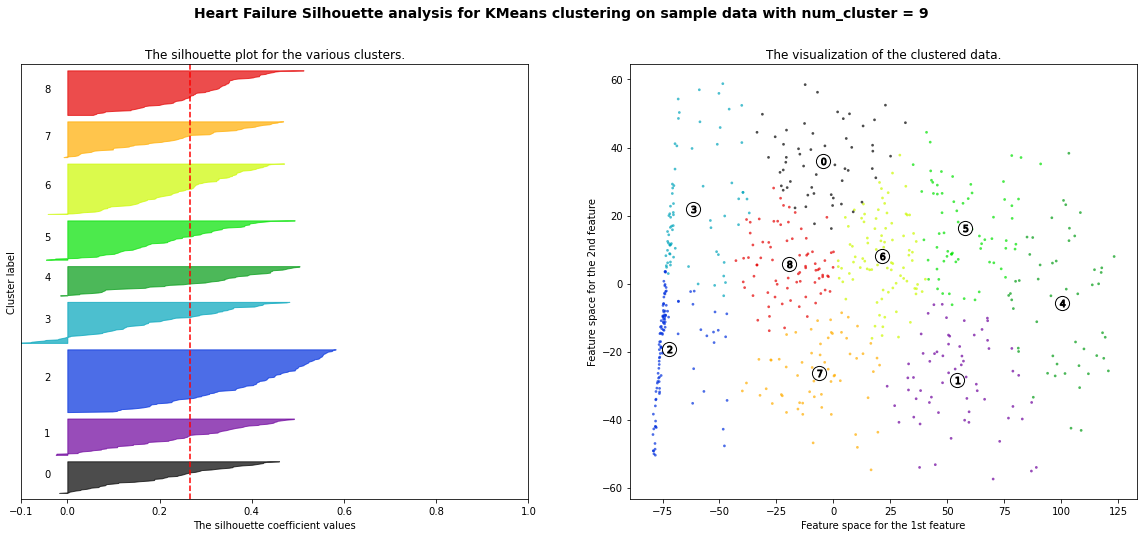

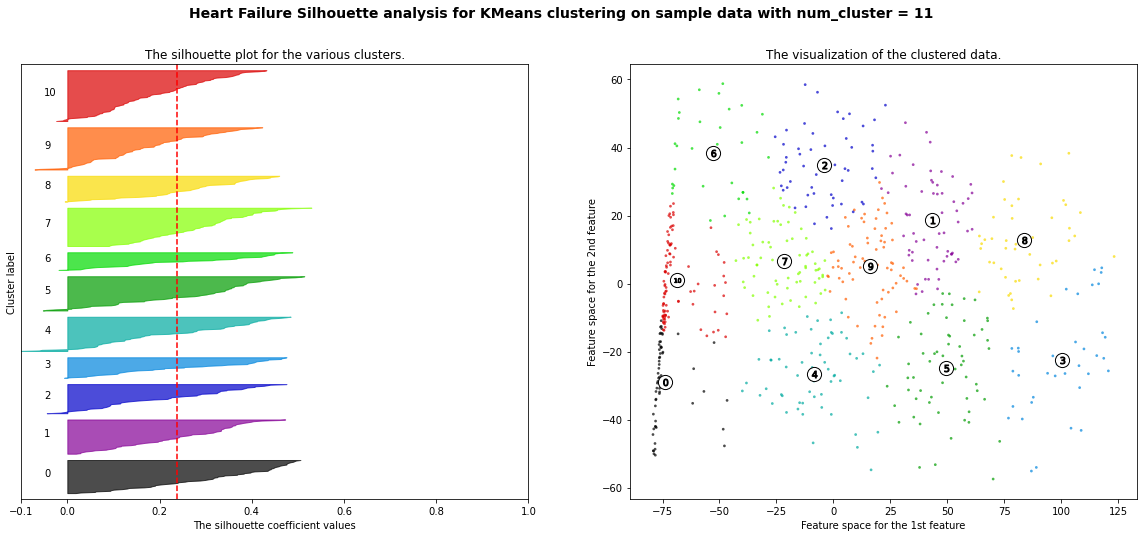

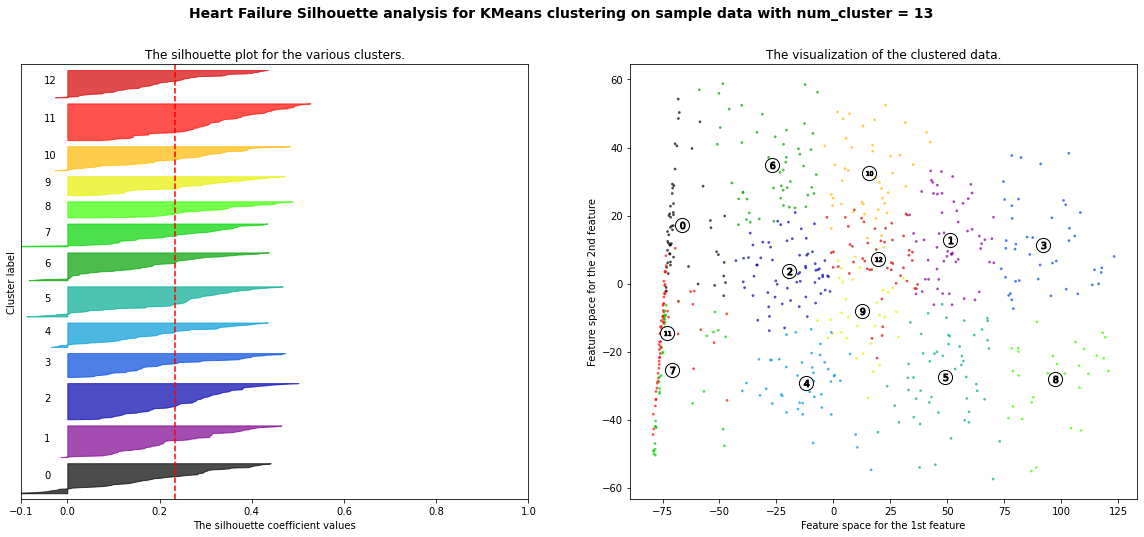

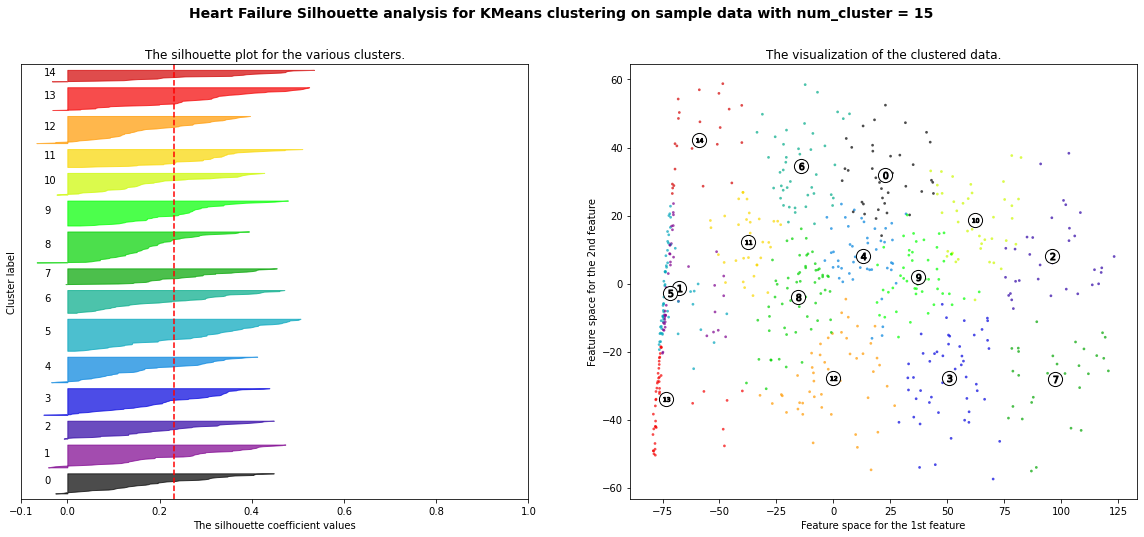

In [11]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_hf_pca) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_hf_pca)
    silhouette_avg = silhouette_score(best_hf_pca, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_hf_pca, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_hf_pca[:, 0], best_hf_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_hf_pca_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [12]:
gmm_best = GaussianMixture(n_components=2, random_state=3169)
gmm_best.fit(best_hf_pca)
gmm_labels = gmm_best.predict(best_hf_pca)

print('GMM BIC: ', gmm_best.bic(best_hf_pca))
score_gmm = silhouette_score(best_hf_pca, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_hf_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_hf_pca)

GMM BIC:  24420.401171326284
GMM Silhouette score:  0.3974269322560091
GMM Adjusted Mutual Information (AMI) score:  0.0003406216039716423



array([[0.019458  , 0.980542  ],
       [0.97509796, 0.02490204],
       [0.04662197, 0.95337803],
       ...,
       [0.23334334, 0.76665666],
       [0.16427752, 0.83572248],
       [0.93641997, 0.06358003]])

3

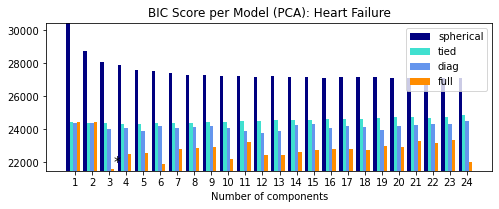

In [30]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_hf_pca)
        bic.append(gmm.bic(best_hf_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (PCA): Heart Failure')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_hf_pca.png')

best_num

## Stroke

In [19]:
%store -r best_s_pca
%store -r Y_s_train

### K Means Results

In [20]:
kmeans = KMeans(n_clusters=3, random_state=3169)
kmeans.fit(best_s_pca)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_s_pca, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_s_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_s_pca)

K-Means Inertia:  315853473.8043263
K-Means Silhouette score:  0.5549860319984841
K-Means Adjusted Mutual Information (AMI) score:  0.002297614572442599



array([[ 941.26051833,   66.24741451, 1887.16560738],
       [ 219.52609454, 1190.04836186,  783.41543915],
       [ 346.45139839, 1347.72004745,  612.70419027],
       ...,
       [ 721.24269365, 1724.78903764,  242.30281955],
       [1396.92003097,  428.67792842, 2335.35115572],
       [1330.27518894,  334.38426035, 2274.14422891]])

### Inertia Analysis

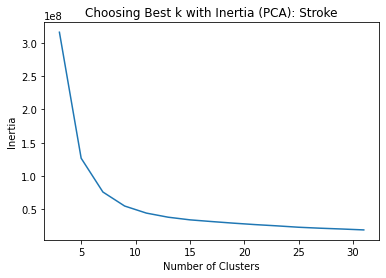

In [31]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_s_pca)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (PCA): Stroke')
plt.savefig('inertia_s_pca.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.5549489585320041
For n_clusters =  5 The average silhouette_score is : 0.5054592915634518
For n_clusters =  7 The average silhouette_score is : 0.4603852299909321
For n_clusters =  9 The average silhouette_score is : 0.42259773738258677
For n_clusters =  11 The average silhouette_score is : 0.38838345119653545
For n_clusters =  13 The average silhouette_score is : 0.3587381170024642
For n_clusters =  15 The average silhouette_score is : 0.33335188546751515


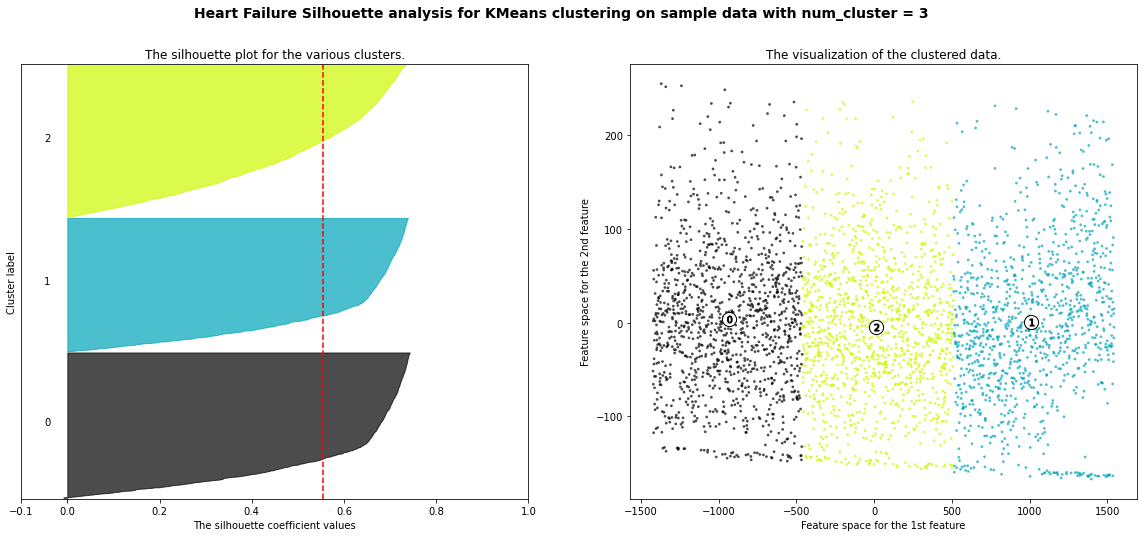

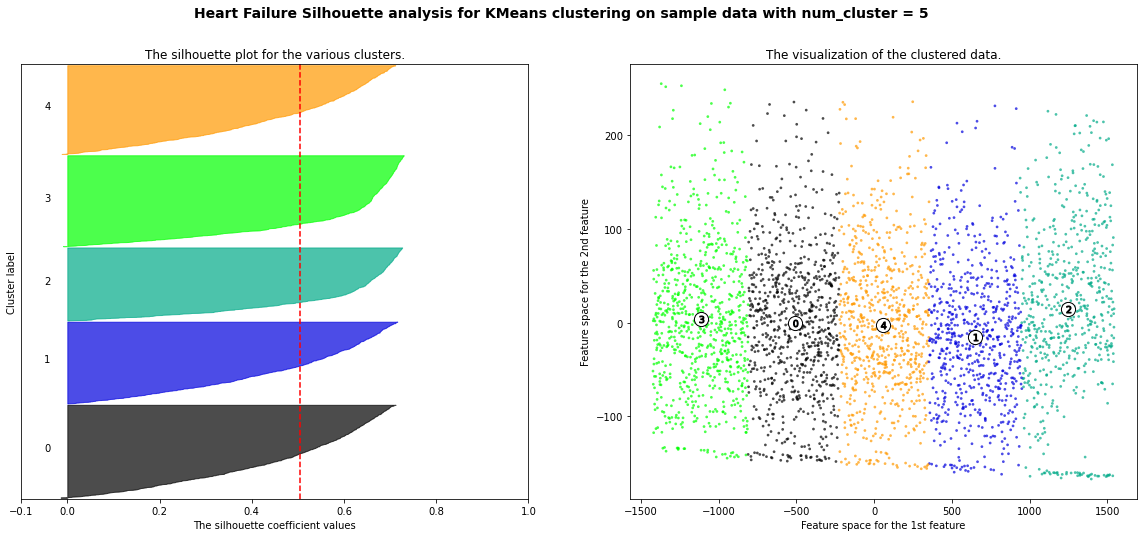

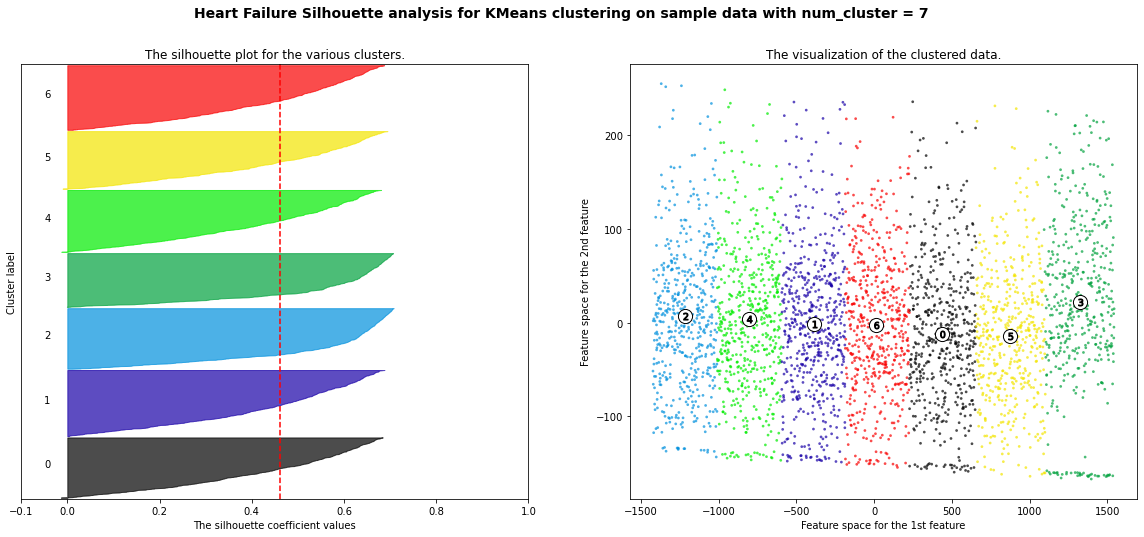

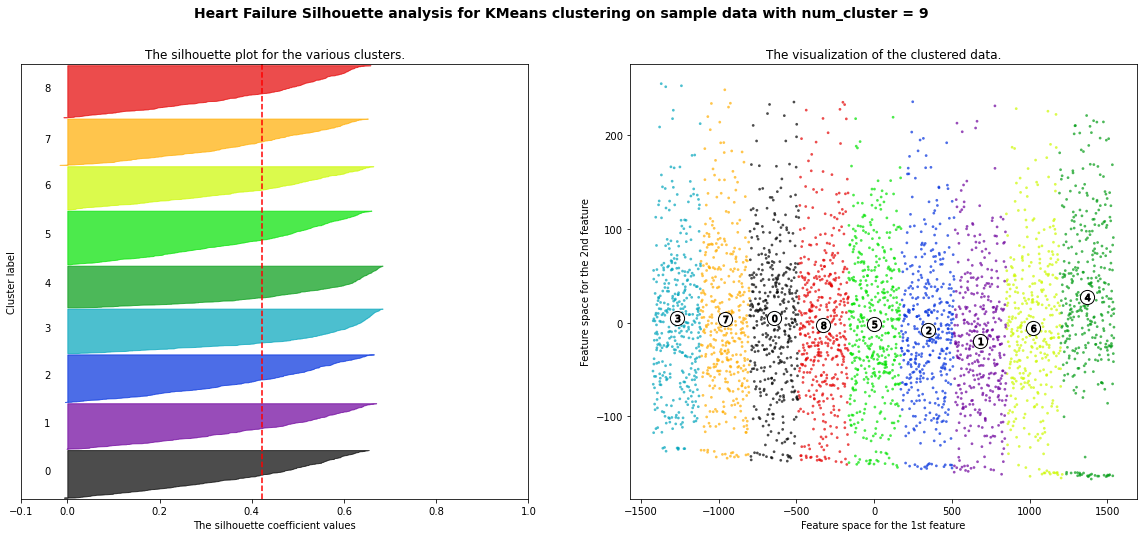

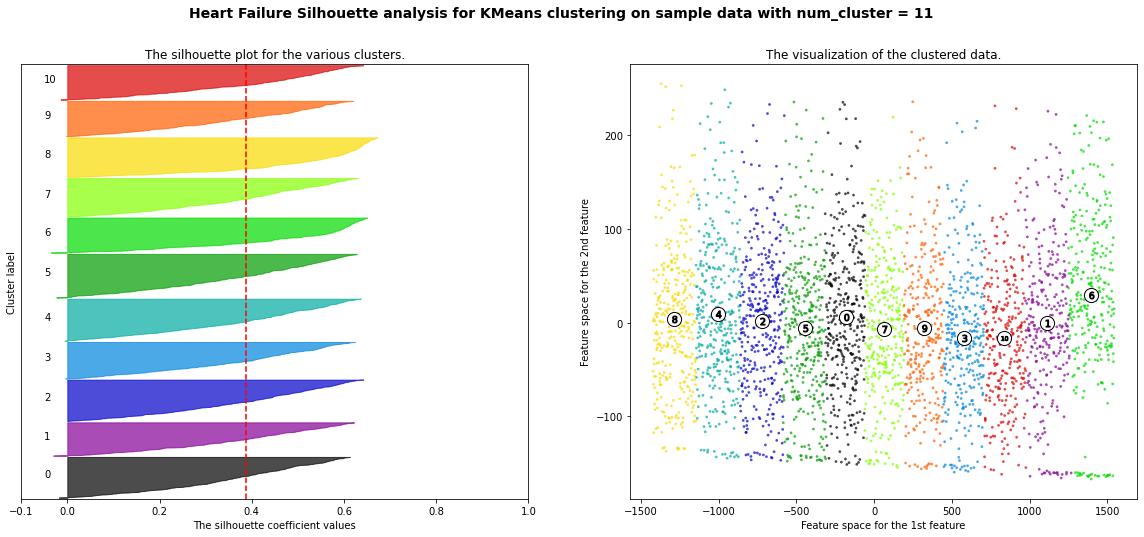

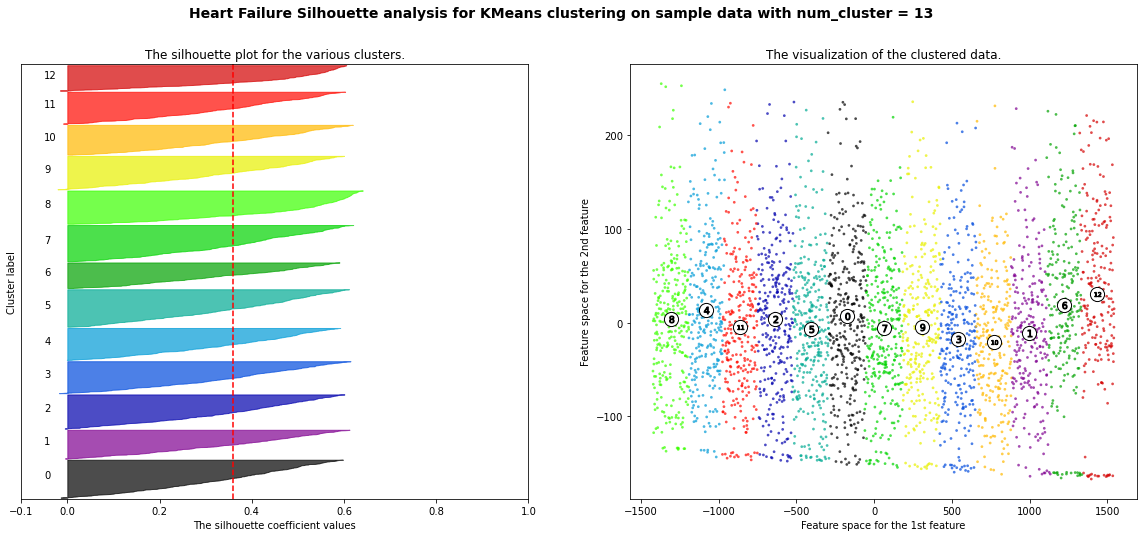

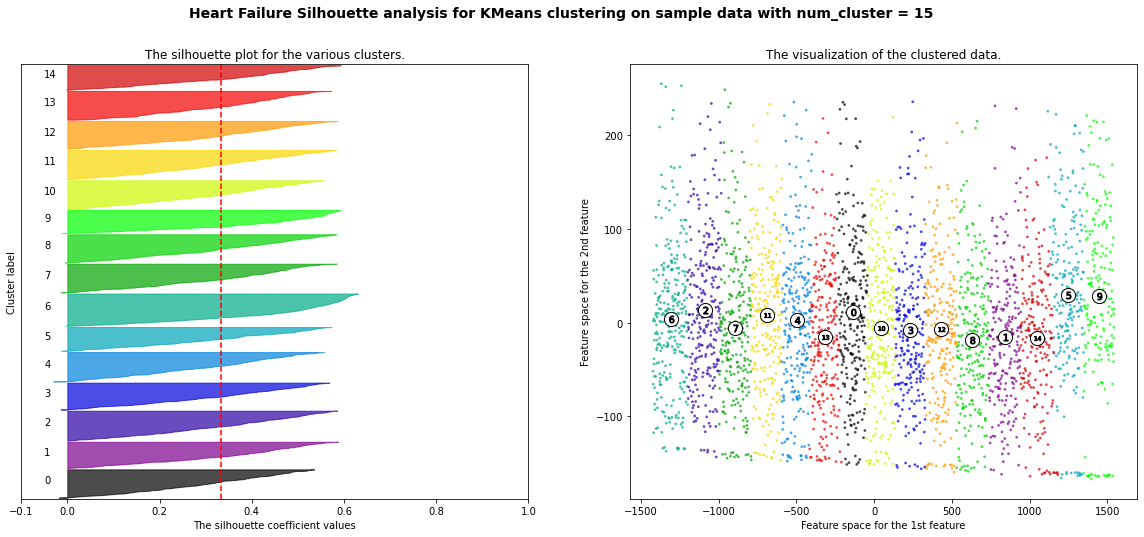

In [22]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_s_pca) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_s_pca)
    silhouette_avg = silhouette_score(best_s_pca, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_s_pca, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_s_pca[:, 0], best_s_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_s_pca_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [23]:
gmm_best = GaussianMixture(n_components=2, random_state=3169)
gmm_best.fit(best_s_pca)
gmm_labels = gmm_best.predict(best_s_pca)

print('GMM BIC: ', gmm_best.bic(best_s_pca))
score_gmm = silhouette_score(best_s_pca, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_s_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_s_pca)

GMM BIC:  131344.6356139311
GMM Silhouette score:  0.5921524844964102
GMM Adjusted Mutual Information (AMI) score:  0.0017527984772630761



array([[5.27633547e-03, 9.94723665e-01],
       [5.15082148e-01, 4.84917852e-01],
       [8.62593566e-01, 1.37406434e-01],
       ...,
       [9.95111681e-01, 4.88831905e-03],
       [3.03796522e-04, 9.99696203e-01],
       [3.93654605e-04, 9.99606345e-01]])

6

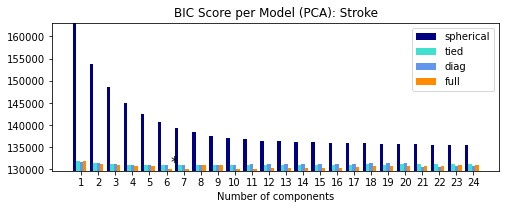

In [32]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_s_pca)
        bic.append(gmm.bic(best_s_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (PCA): Stroke')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_s_pca.png')

best_num

# K Means and GMM on ICA

## Heart Failure

In [25]:
%store -r best_hf_ica

### K Means Results

In [26]:
kmeans = KMeans(n_clusters=5, random_state=3169)
kmeans.fit(best_hf_ica)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_hf_ica, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_hf_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_hf_ica)

K-Means Inertia:  2.8928425257407766
K-Means Silhouette score:  0.1789984001525528
K-Means Adjusted Mutual Information (AMI) score:  0.08696148142361397



array([[0.08143857, 0.12315924, 0.11010348, 0.05374579, 0.08746985],
       [0.08316704, 0.09528031, 0.04745572, 0.10609374, 0.0792448 ],
       [0.1164764 , 0.12817102, 0.16217385, 0.10245799, 0.11689915],
       ...,
       [0.10510865, 0.07417058, 0.11076866, 0.1105864 , 0.05329671],
       [0.01809812, 0.09905908, 0.10576431, 0.10143956, 0.09268567],
       [0.06406252, 0.09580124, 0.08719627, 0.09895558, 0.10982498]])

### Inertia Analysis

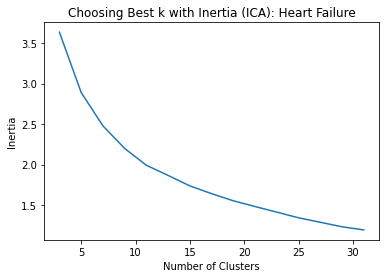

In [28]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_hf_ica)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (ICA): Heart Failure')
plt.savefig('inertia_hf_ica.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.16998270118137546
For n_clusters =  5 The average silhouette_score is : 0.1792028332984392
For n_clusters =  7 The average silhouette_score is : 0.17480648814487362
For n_clusters =  9 The average silhouette_score is : 0.17764768011814416
For n_clusters =  11 The average silhouette_score is : 0.17931638698091545
For n_clusters =  13 The average silhouette_score is : 0.17470129924501387
For n_clusters =  15 The average silhouette_score is : 0.18101344491540705


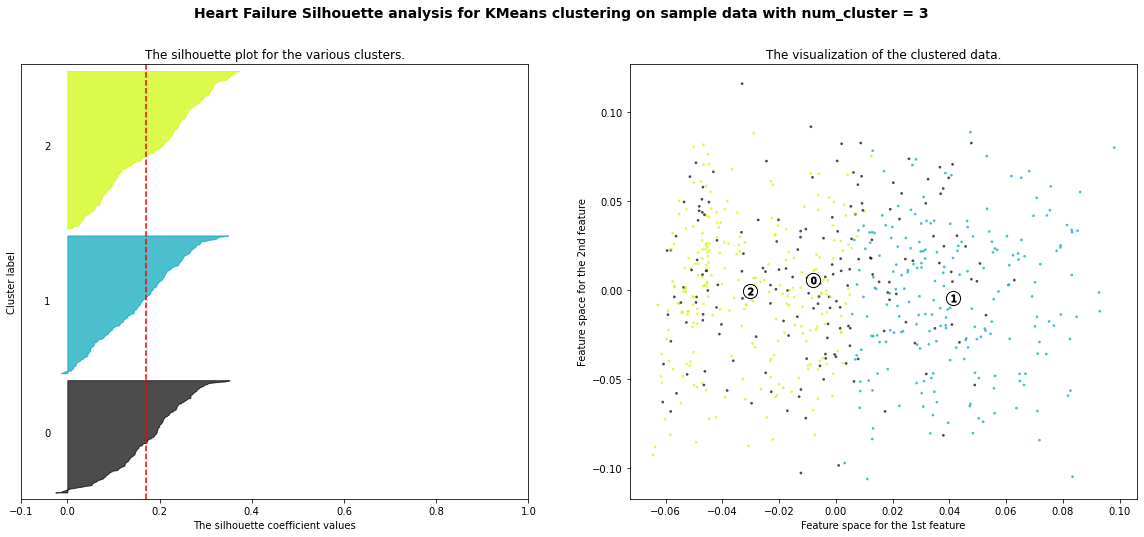

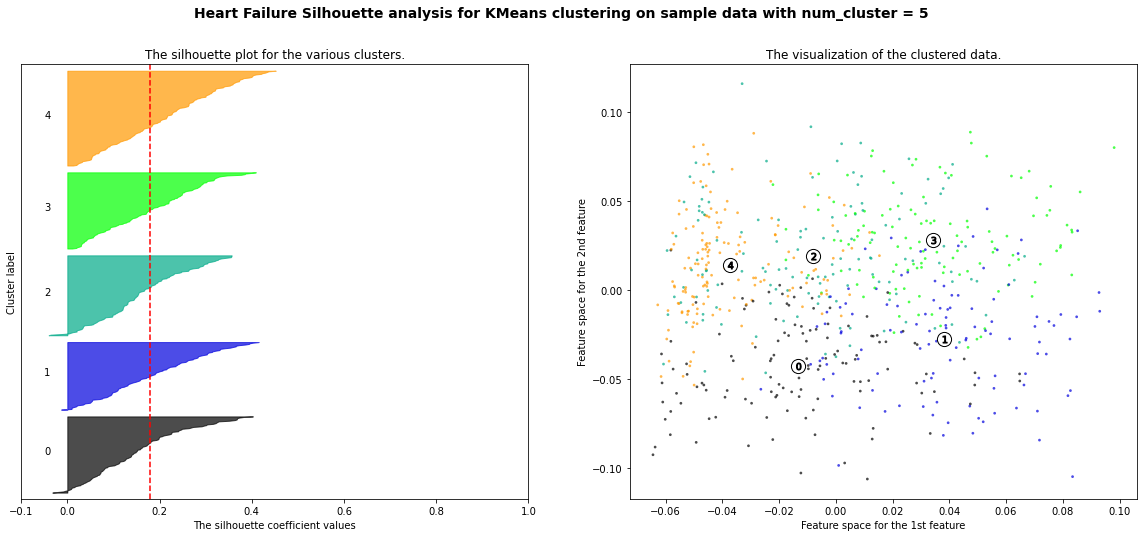

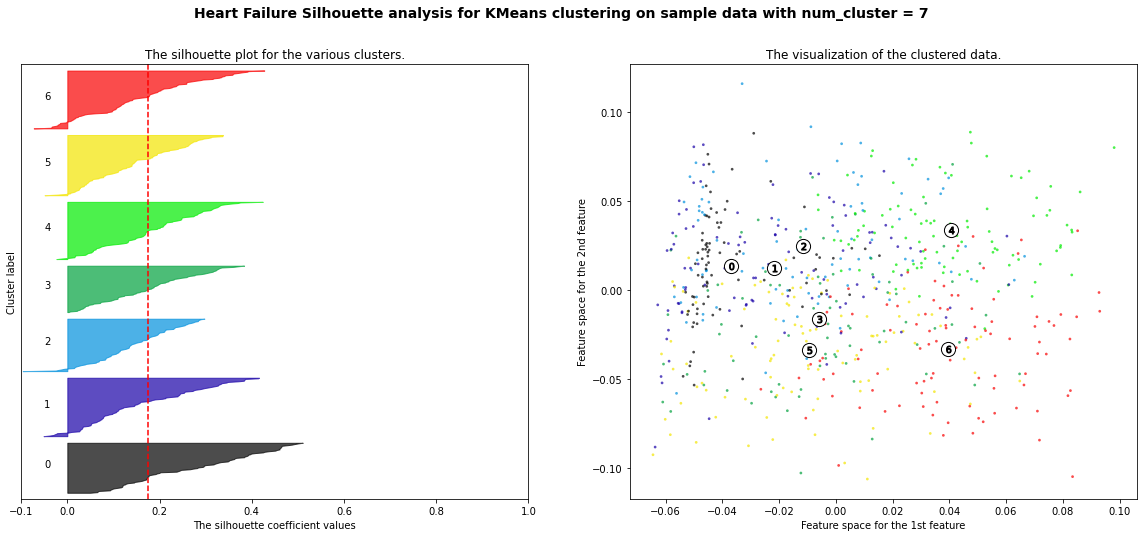

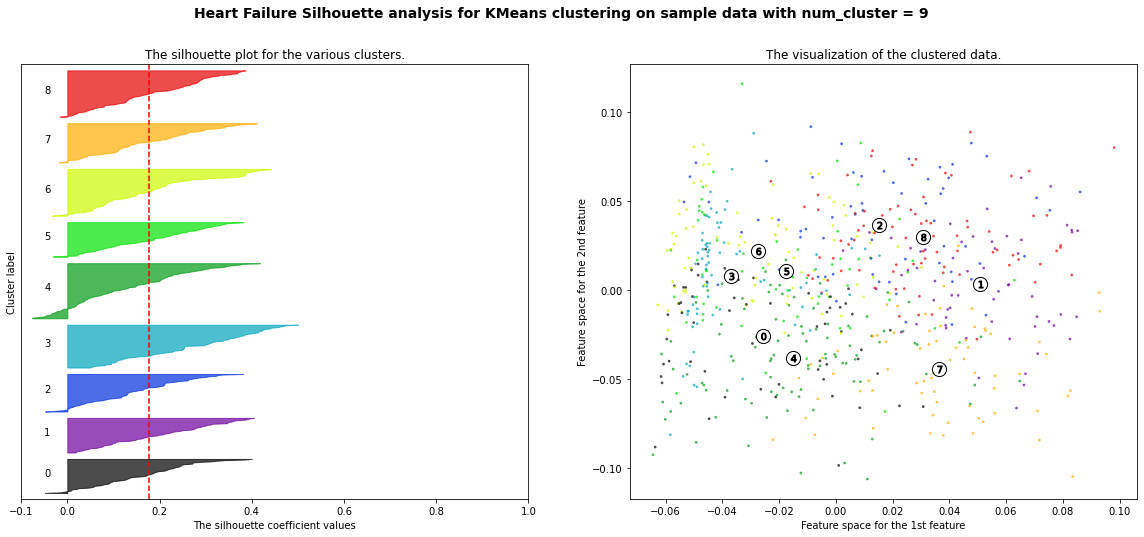

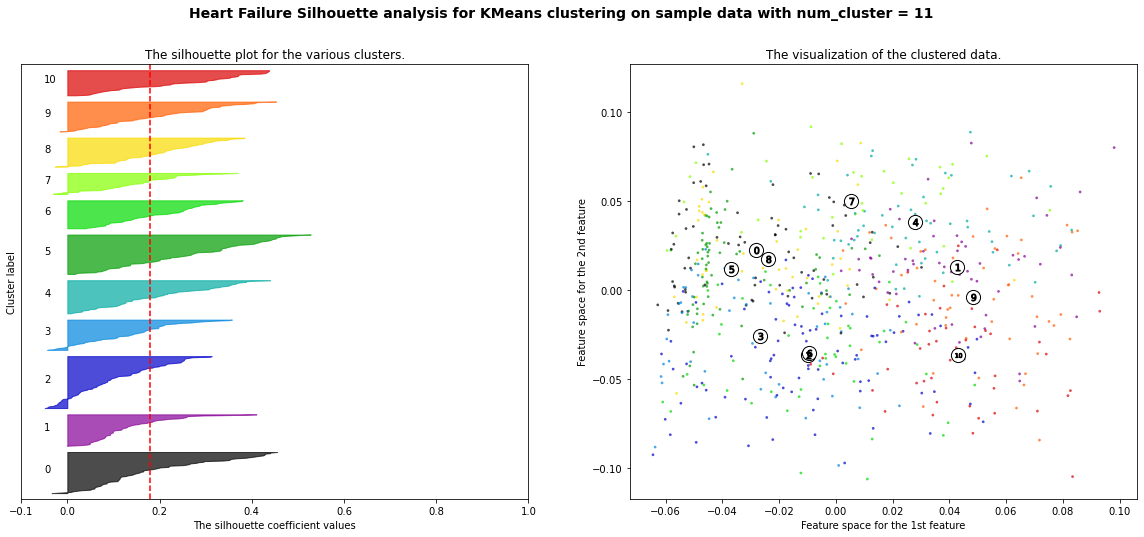

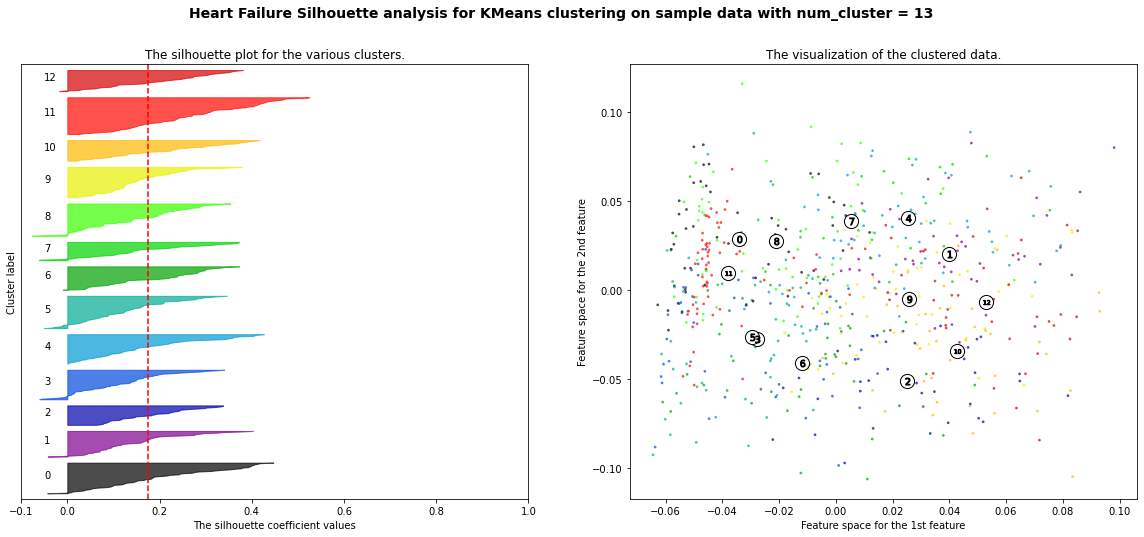

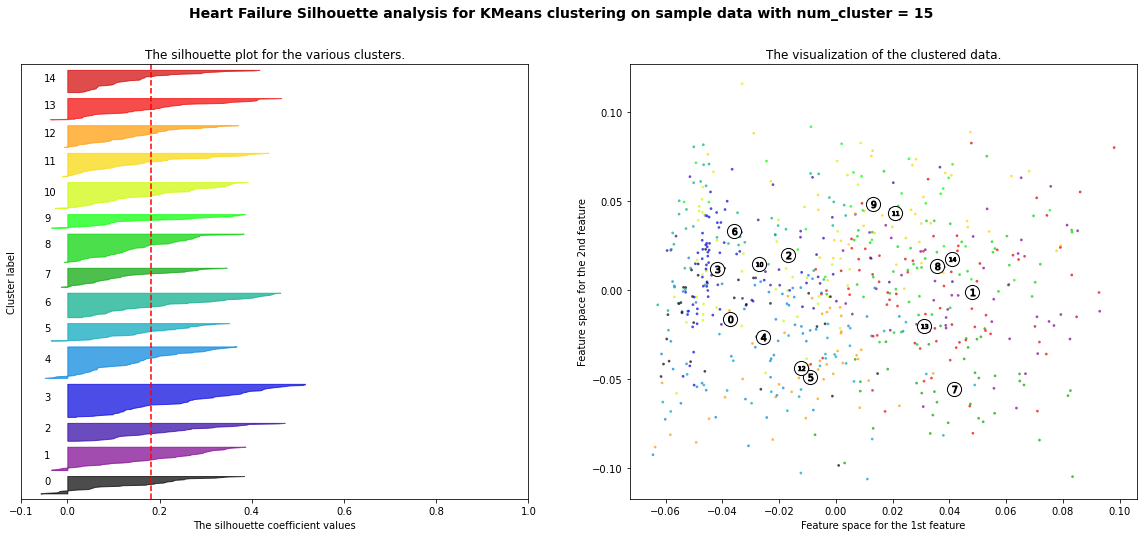

In [33]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_hf_ica) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_hf_ica)
    silhouette_avg = silhouette_score(best_hf_ica, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_hf_ica, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_hf_ica[:, 0], best_hf_ica[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_hf_ica_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [34]:
gmm_best = GaussianMixture(n_components=2, random_state=3169)
gmm_best.fit(best_hf_ica)
gmm_labels = gmm_best.predict(best_hf_ica)

print('GMM BIC: ', gmm_best.bic(best_hf_ica))
score_gmm = silhouette_score(best_hf_ica, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_hf_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_hf_ica)

GMM BIC:  -11719.050705556516
GMM Silhouette score:  0.18667249280966833
GMM Adjusted Mutual Information (AMI) score:  0.0366476281340985



array([[4.86361630e-04, 9.99513638e-01],
       [9.99985945e-01, 1.40550292e-05],
       [7.62163047e-04, 9.99237837e-01],
       ...,
       [9.99998057e-01, 1.94265045e-06],
       [9.63096422e-01, 3.69035776e-02],
       [9.20243620e-01, 7.97563801e-02]])

18

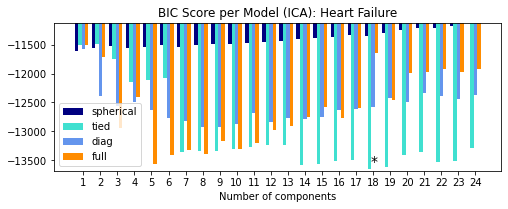

In [35]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_hf_ica)
        bic.append(gmm.bic(best_hf_ica))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (ICA): Heart Failure')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_hf_ica.png')

best_num

## Stroke

In [36]:
%store -r best_s_ica

### K Means Results

In [37]:
kmeans = KMeans(n_clusters=3, random_state=3169)
kmeans.fit(best_s_ica)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_s_ica, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_s_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_s_ica)

K-Means Inertia:  1.7139827958003426
K-Means Silhouette score:  0.27913076692242245
K-Means Adjusted Mutual Information (AMI) score:  0.0245260614622256



array([[0.03373197, 0.0035187 , 0.03440577],
       [0.05311798, 0.05435886, 0.02125756],
       [0.0302009 , 0.0359141 , 0.00837623],
       ...,
       [0.02090096, 0.03966168, 0.03329598],
       [0.06108851, 0.05019862, 0.06493823],
       [0.04297003, 0.02059245, 0.05075857]])

### Inertia Analysis

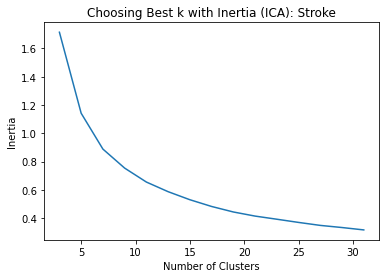

In [38]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_s_ica)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (ICA): Stroke')
plt.savefig('inertia_s_ica.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.2791059873668129
For n_clusters =  5 The average silhouette_score is : 0.28327679700960834
For n_clusters =  7 The average silhouette_score is : 0.28397373126665754
For n_clusters =  9 The average silhouette_score is : 0.266394820581473
For n_clusters =  11 The average silhouette_score is : 0.25683424922118353
For n_clusters =  13 The average silhouette_score is : 0.26189824395884553
For n_clusters =  15 The average silhouette_score is : 0.2607939370493127


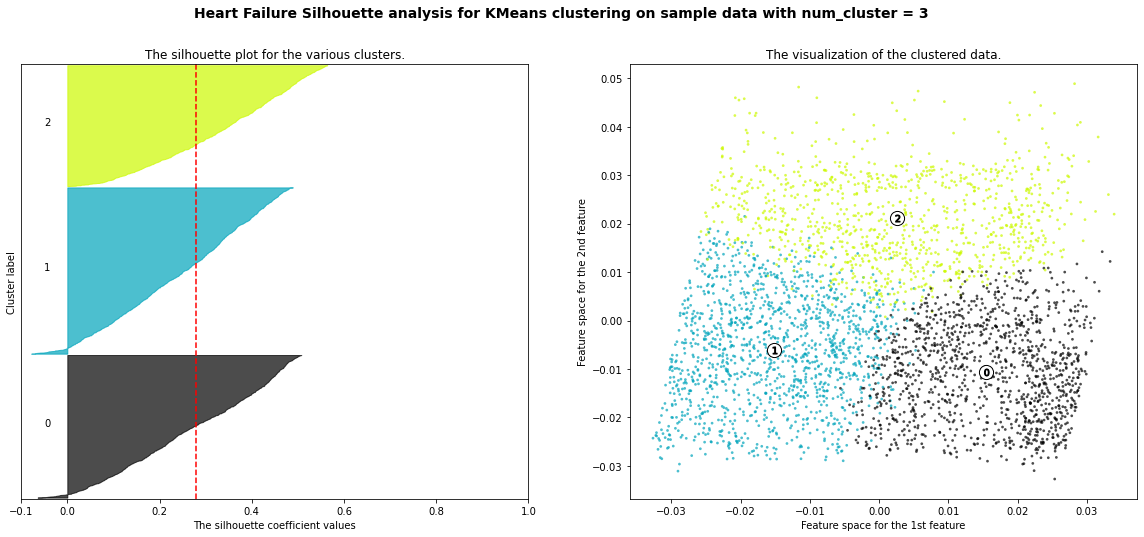

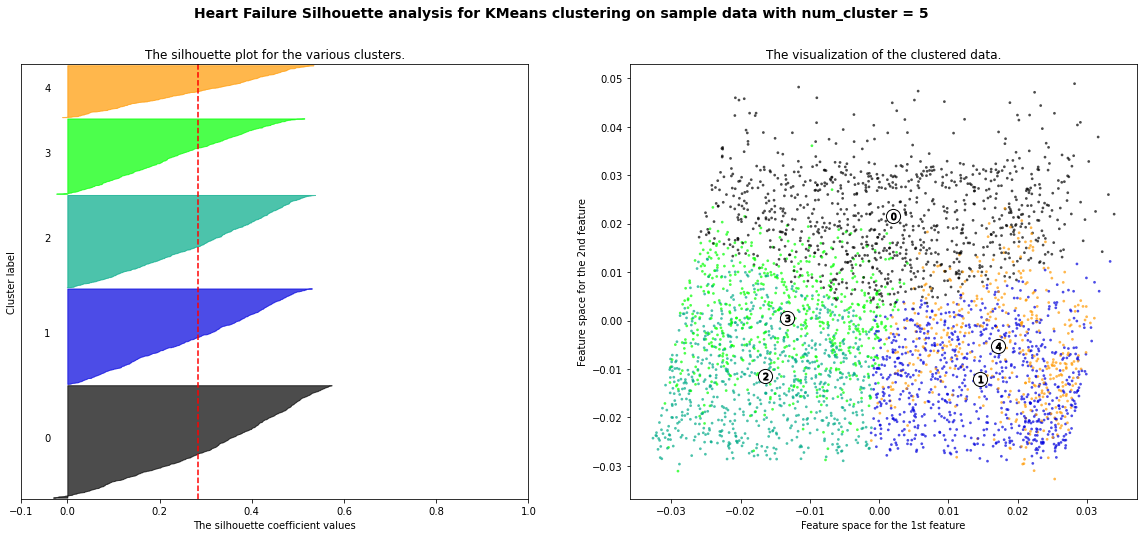

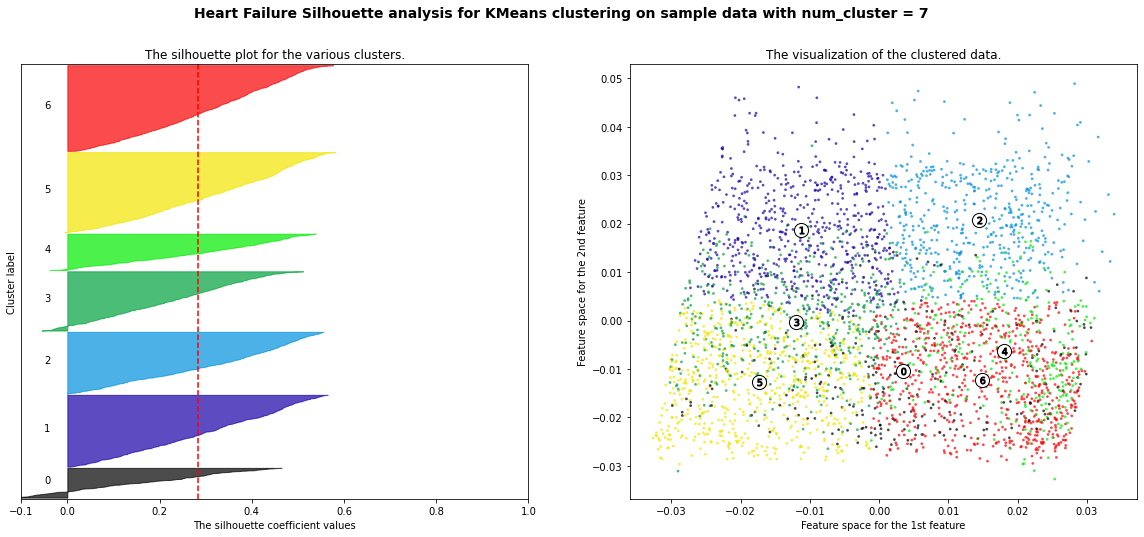

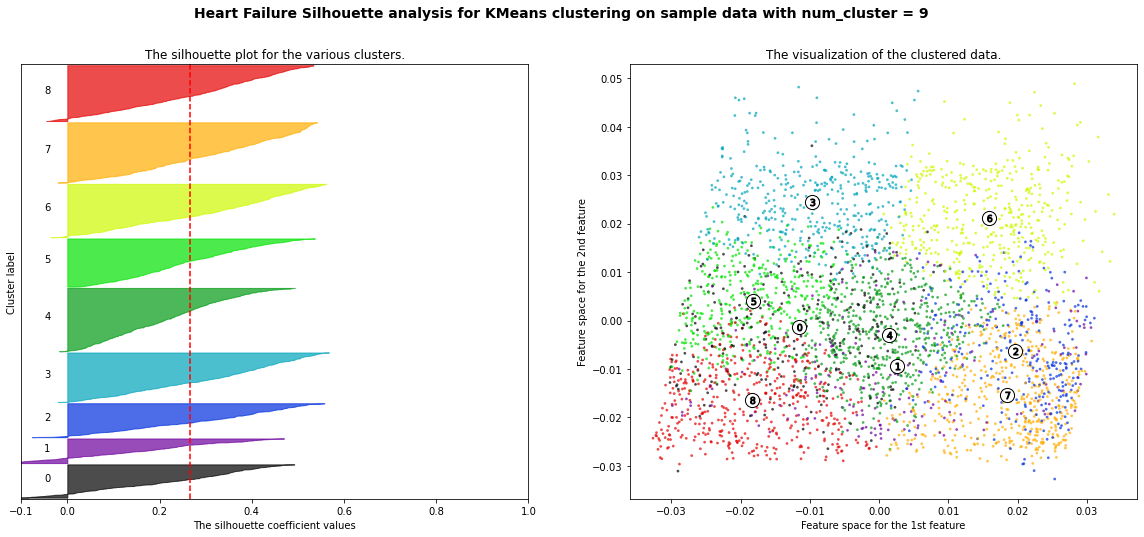

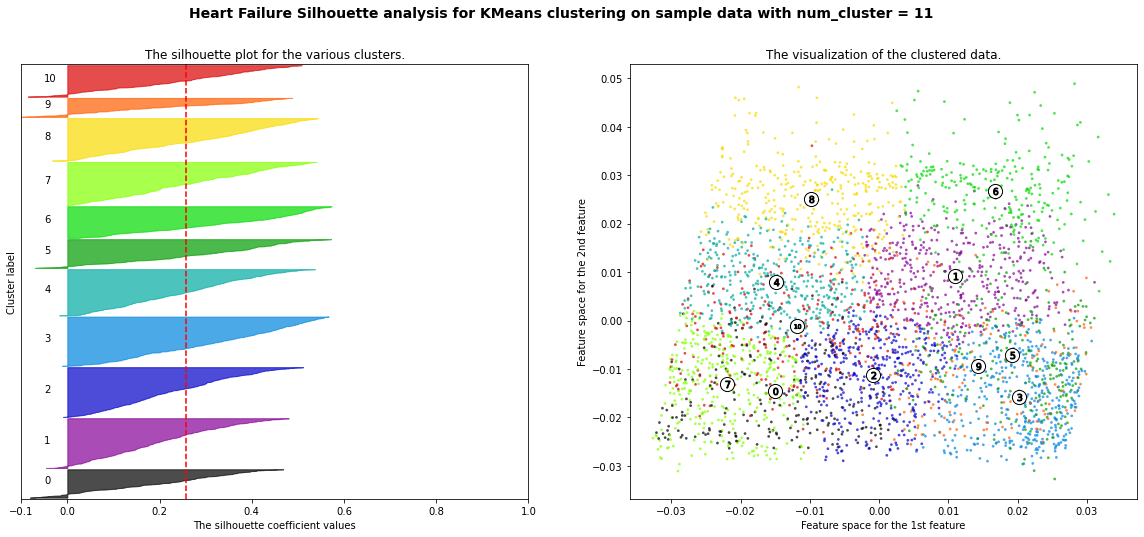

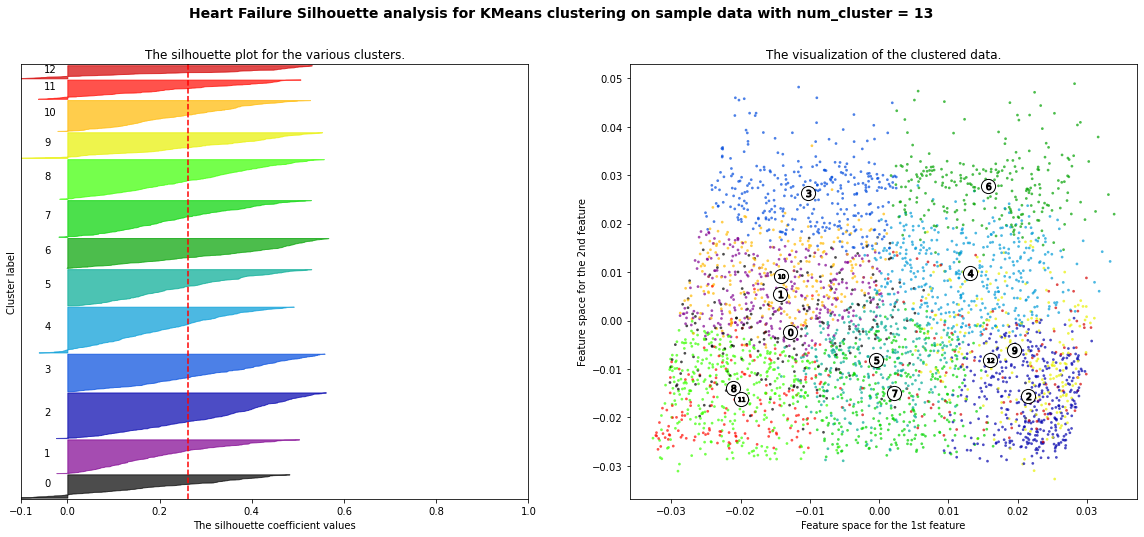

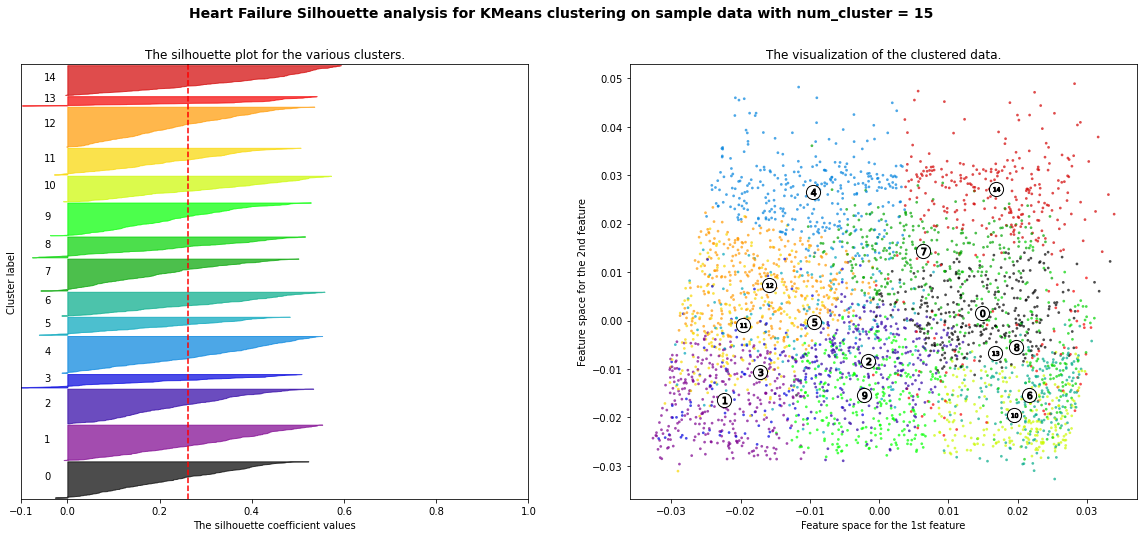

In [39]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_s_ica) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_s_ica)
    silhouette_avg = silhouette_score(best_s_ica, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_s_ica, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_s_ica[:, 0], best_s_ica[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_s_ica_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [40]:
gmm_best = GaussianMixture(n_components=2, random_state=3169)
gmm_best.fit(best_s_ica)
gmm_labels = gmm_best.predict(best_s_ica)

print('GMM BIC: ', gmm_best.bic(best_s_ica))
score_gmm = silhouette_score(best_s_ica, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_s_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_s_ica)

GMM BIC:  -58290.49556338428
GMM Silhouette score:  0.2228074846819641
GMM Adjusted Mutual Information (AMI) score:  0.03309946101932854



array([[2.02413189e-02, 9.79758681e-01],
       [9.99983731e-01, 1.62692109e-05],
       [9.81642816e-01, 1.83571837e-02],
       ...,
       [1.33943380e-01, 8.66056620e-01],
       [1.47918282e-06, 9.99998521e-01],
       [2.36937945e-03, 9.97630621e-01]])

12

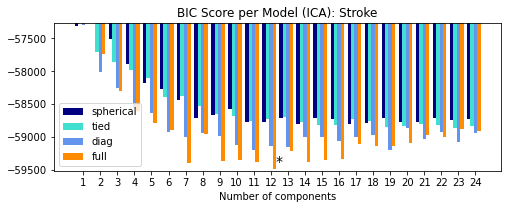

In [41]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_s_ica)
        bic.append(gmm.bic(best_s_ica))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (ICA): Stroke')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_s_ica.png')

best_num

# K Means and GMM on Random Projection

## Heart Failure

In [42]:
%store -r best_hf_rp

### K Means Results

In [43]:
kmeans = KMeans(n_clusters=5, random_state=3169)
kmeans.fit(best_hf_rp)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_hf_rp, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_hf_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_hf_rp)

K-Means Inertia:  428582.7309559238
K-Means Silhouette score:  0.31190101825417577
K-Means Adjusted Mutual Information (AMI) score:  0.07378100285593381



array([[ 46.29454958,  13.35193919,  78.90849417,  39.49008447,
        107.07966128],
       [ 14.9242633 ,  60.49103785,  40.63307697,  59.90793797,
         52.26456819],
       [ 87.25736334,  58.85760086, 102.26293034,  45.33304407,
        142.29460046],
       ...,
       [ 42.62352567,  30.92616039,  66.65248635,  27.30753916,
         99.80816308],
       [ 50.79085166,  57.56927915,  50.98450569,  14.77030197,
         94.68774369],
       [ 44.19710891,  85.52892786,  20.86388297,  64.4066491 ,
         47.61552647]])

### Inertia Analysis

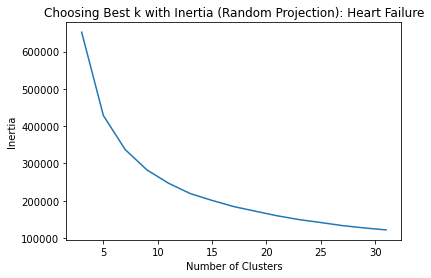

In [44]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_hf_rp)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (Random Projection): Heart Failure')
plt.savefig('inertia_hf_rp.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.3187352283778091
For n_clusters =  5 The average silhouette_score is : 0.31169089931105887
For n_clusters =  7 The average silhouette_score is : 0.27221460328776403
For n_clusters =  9 The average silhouette_score is : 0.2666226488856278
For n_clusters =  11 The average silhouette_score is : 0.2624276591677938
For n_clusters =  13 The average silhouette_score is : 0.2580098532231206
For n_clusters =  15 The average silhouette_score is : 0.25413899534216083


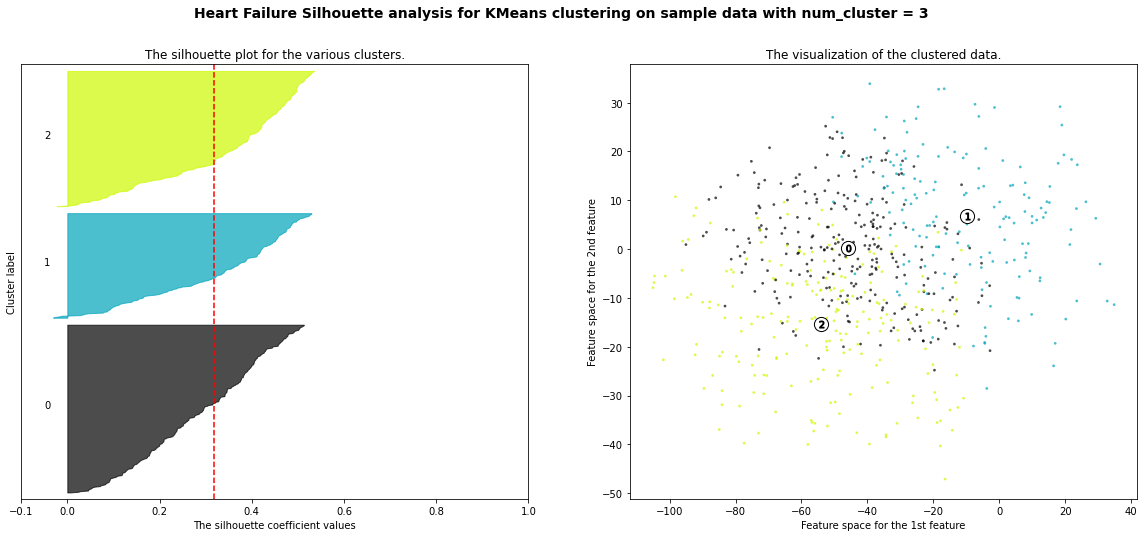

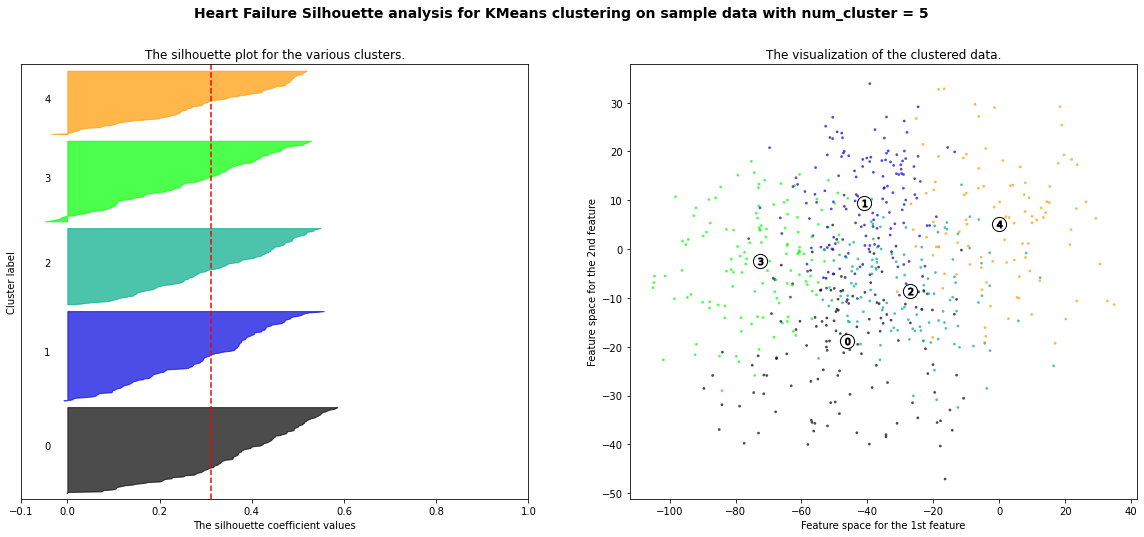

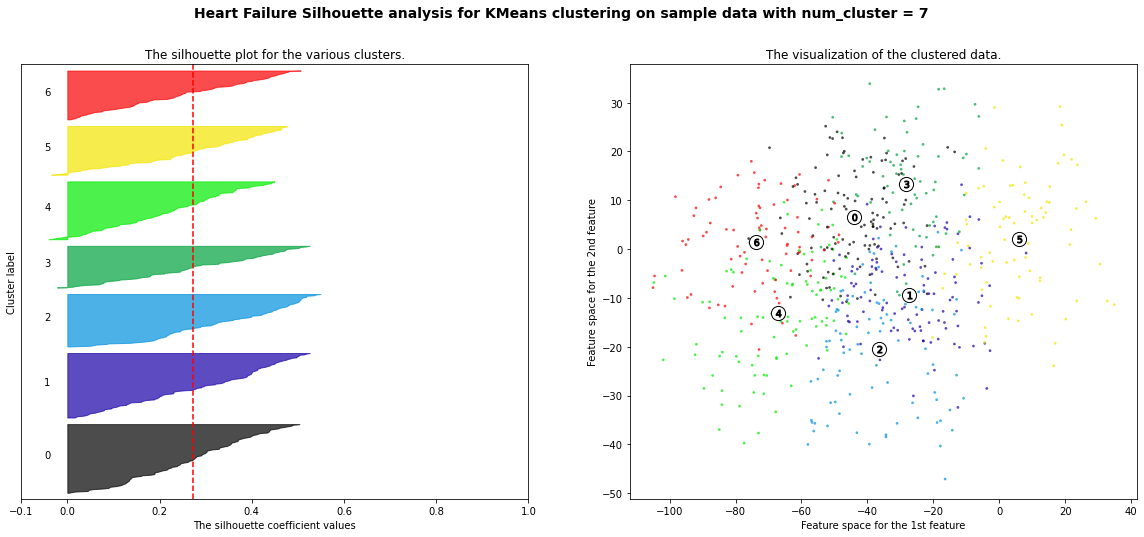

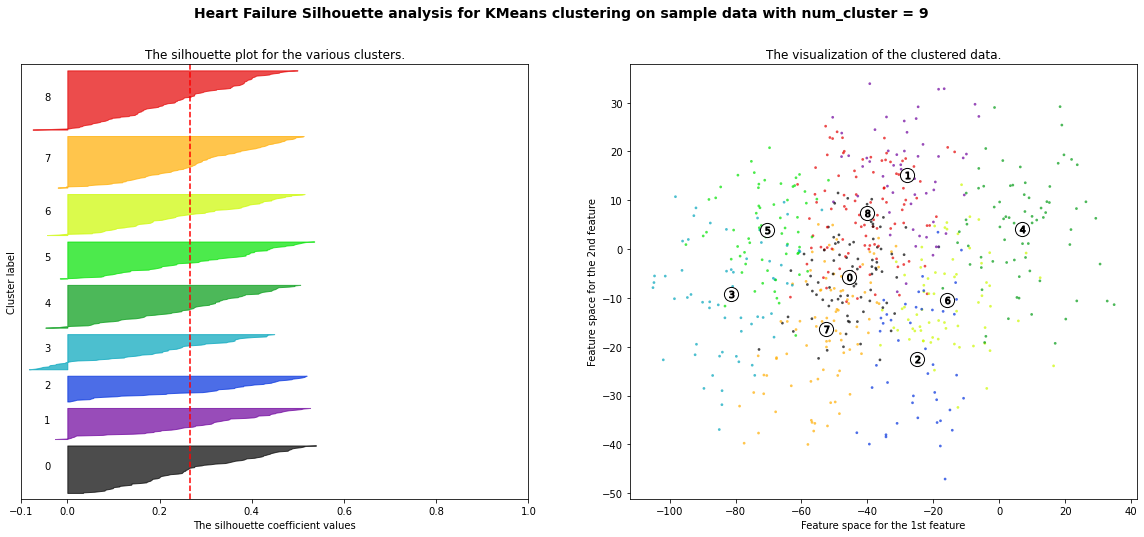

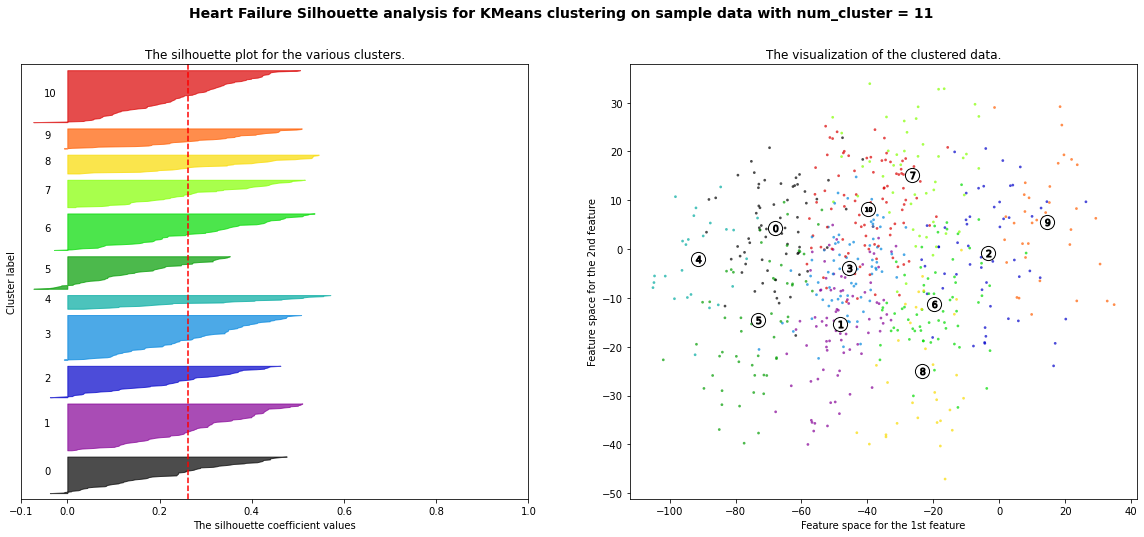

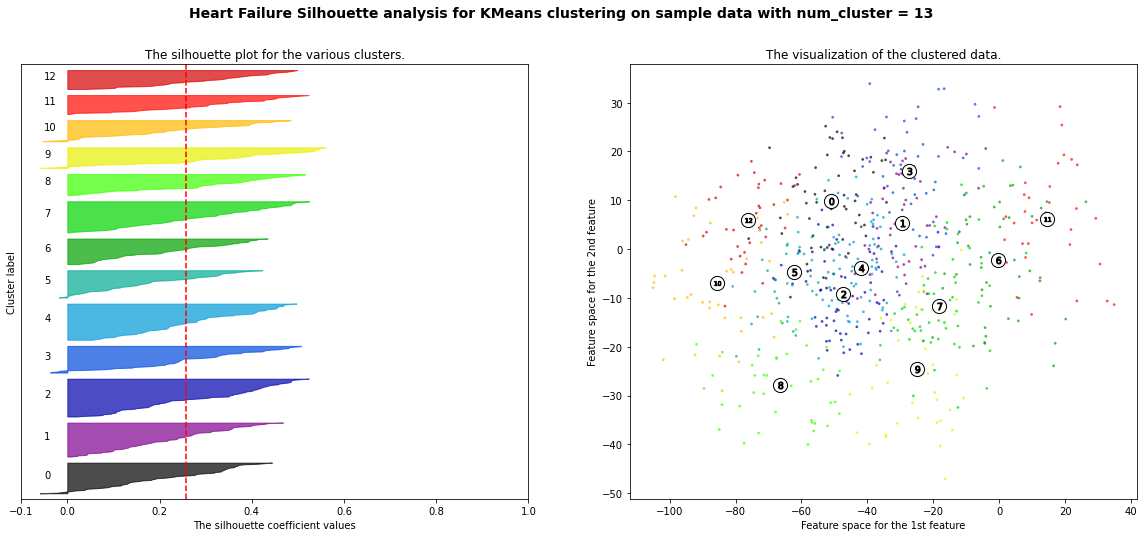

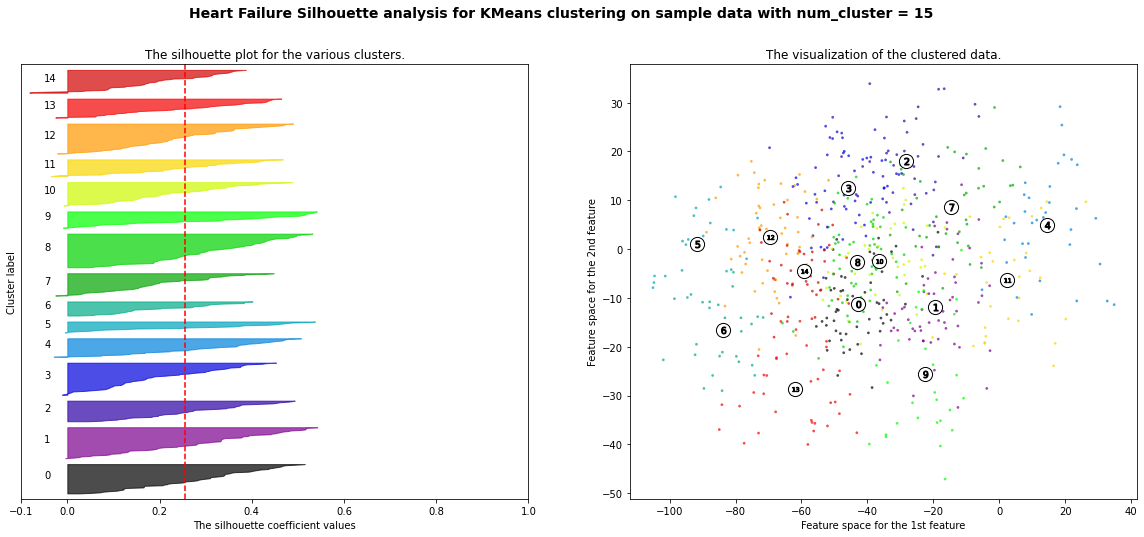

In [45]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_hf_rp) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_hf_rp)
    silhouette_avg = silhouette_score(best_hf_rp, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_hf_rp, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_hf_rp[:, 0], best_hf_rp[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_hf_rp_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [46]:
gmm_best = GaussianMixture(n_components=2, random_state=3169)
gmm_best.fit(best_hf_rp)
gmm_labels = gmm_best.predict(best_hf_rp)

print('GMM BIC: ', gmm_best.bic(best_hf_rp))
score_gmm = silhouette_score(best_hf_rp, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_hf_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_hf_rp)

GMM BIC:  22655.050246490628
GMM Silhouette score:  0.3578241754058751
GMM Adjusted Mutual Information (AMI) score:  0.0030390390210311485



array([[0.02538647, 0.97461353],
       [0.91774386, 0.08225614],
       [0.03576631, 0.96423369],
       ...,
       [0.32058631, 0.67941369],
       [0.08147601, 0.91852399],
       [0.92160743, 0.07839257]])

3

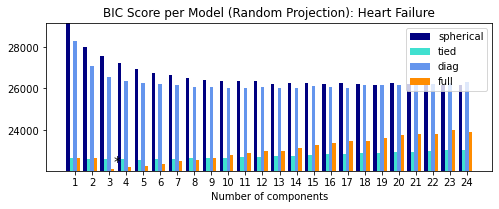

In [47]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_hf_rp)
        bic.append(gmm.bic(best_hf_rp))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (Random Projection): Heart Failure')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_hf_rp.png')

best_num

## Stroke

In [48]:
%store -r best_s_rp

### K Means Results

In [49]:
kmeans = KMeans(n_clusters=3, random_state=3169)
kmeans.fit(best_s_rp)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_s_rp, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_s_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_s_rp)

K-Means Inertia:  273647943.3388884
K-Means Silhouette score:  0.5749773813696454
K-Means Adjusted Mutual Information (AMI) score:  0.0029313145334189197



array([[ 920.96583825, 1818.59160433,   46.31554717],
       [ 196.980051  ,  707.41471581, 1159.5593492 ],
       [ 328.28767535,  570.48486581, 1294.63050397],
       ...,
       [ 691.81505731,  207.20579332, 1658.41645654],
       [1311.00233972, 2208.23961695,  346.75815349],
       [1289.8640473 , 2187.37738211,  323.73880916]])

### Inertia Analysis

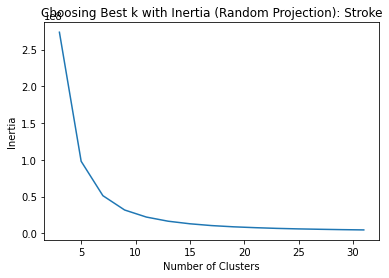

In [50]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_s_rp)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (Random Projection): Stroke')
plt.savefig('inertia_s_rp.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.5749773813696454
For n_clusters =  5 The average silhouette_score is : 0.549542007130117
For n_clusters =  7 The average silhouette_score is : 0.5292346776808666
For n_clusters =  9 The average silhouette_score is : 0.5180035849675669
For n_clusters =  11 The average silhouette_score is : 0.5021850942163271
For n_clusters =  13 The average silhouette_score is : 0.4879284481019051
For n_clusters =  15 The average silhouette_score is : 0.47201854665649545


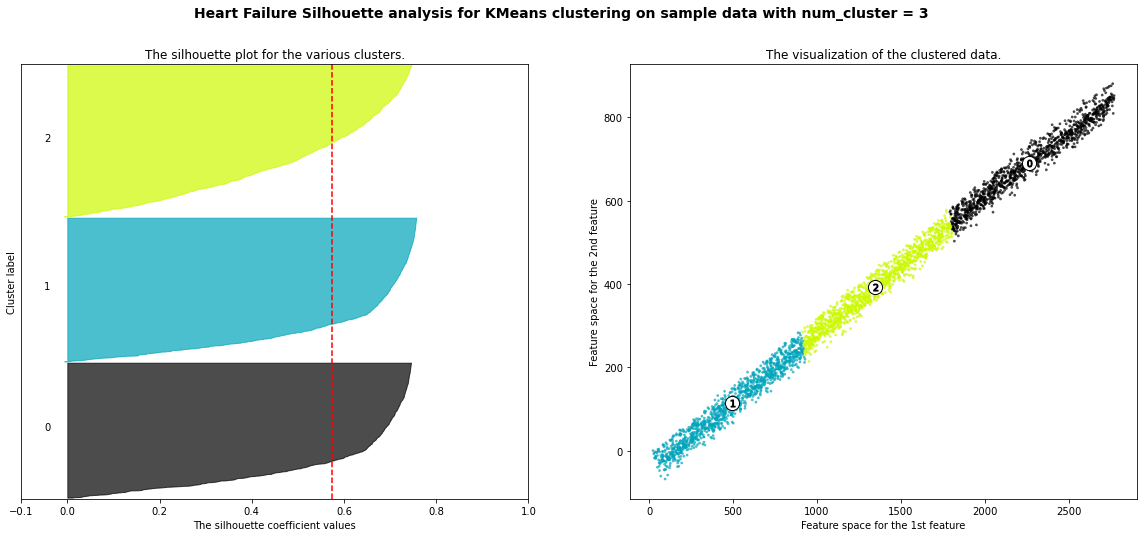

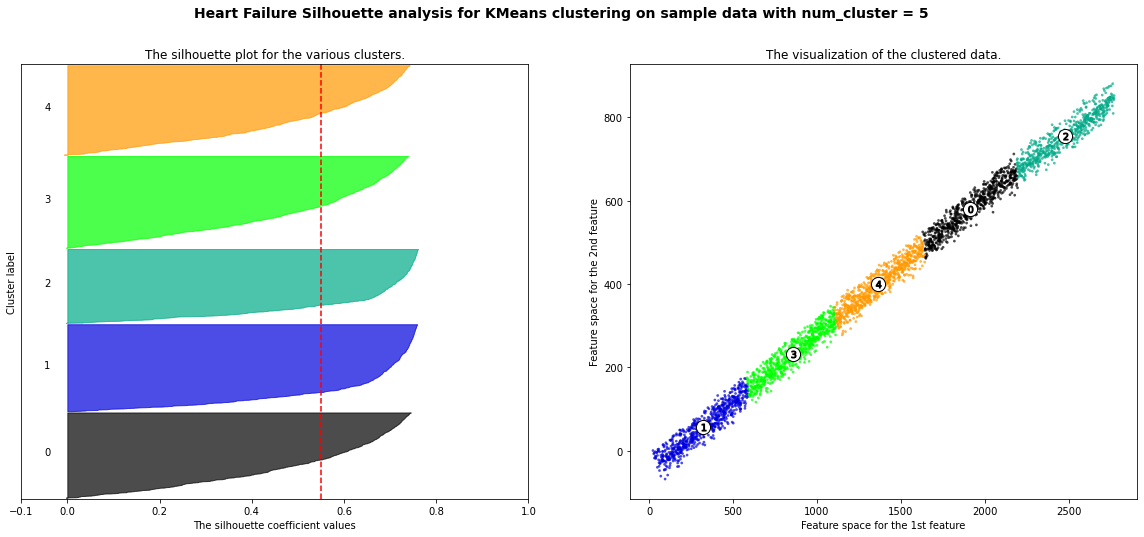

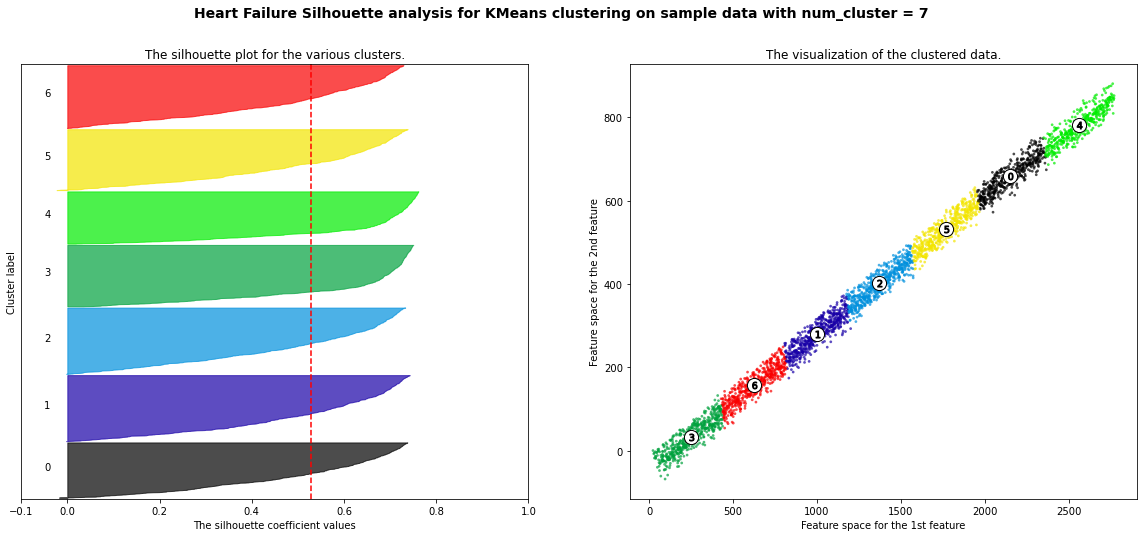

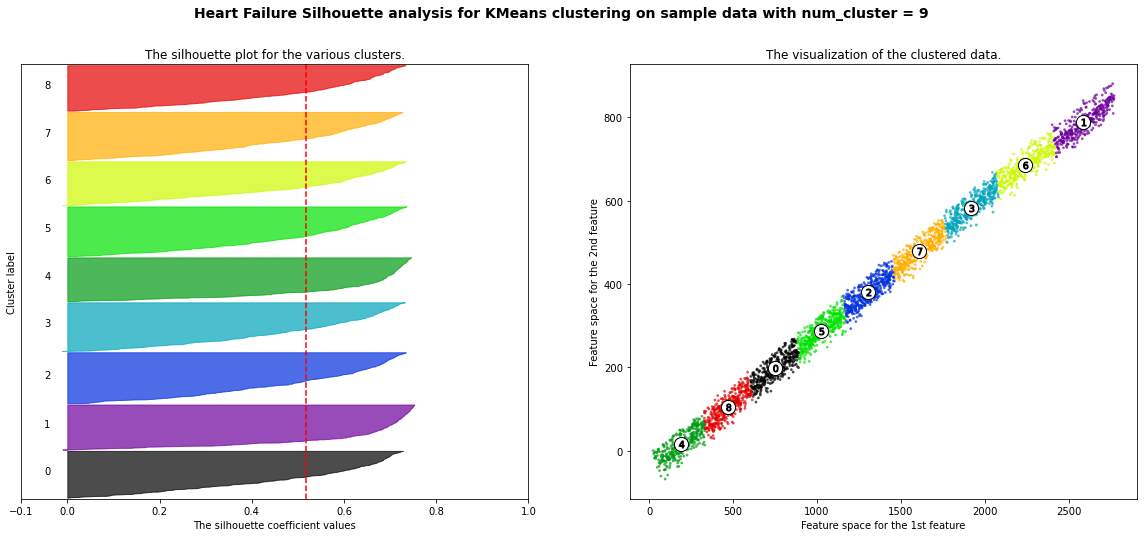

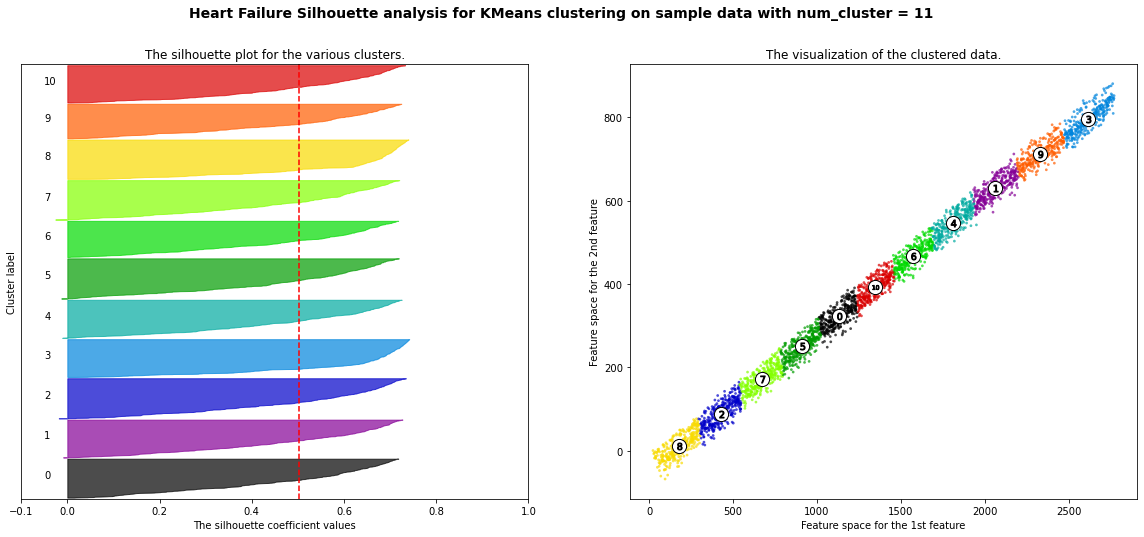

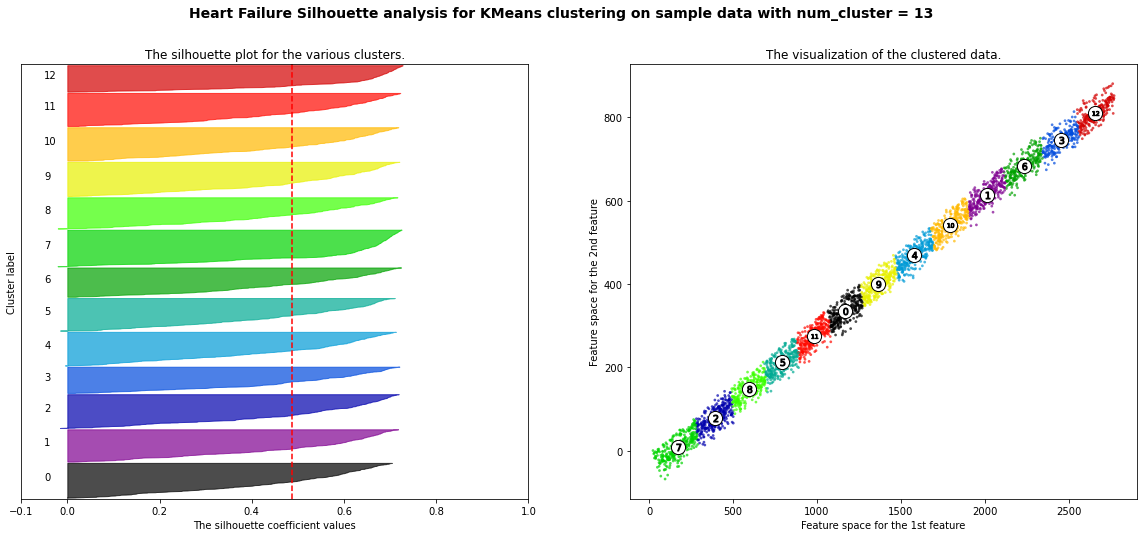

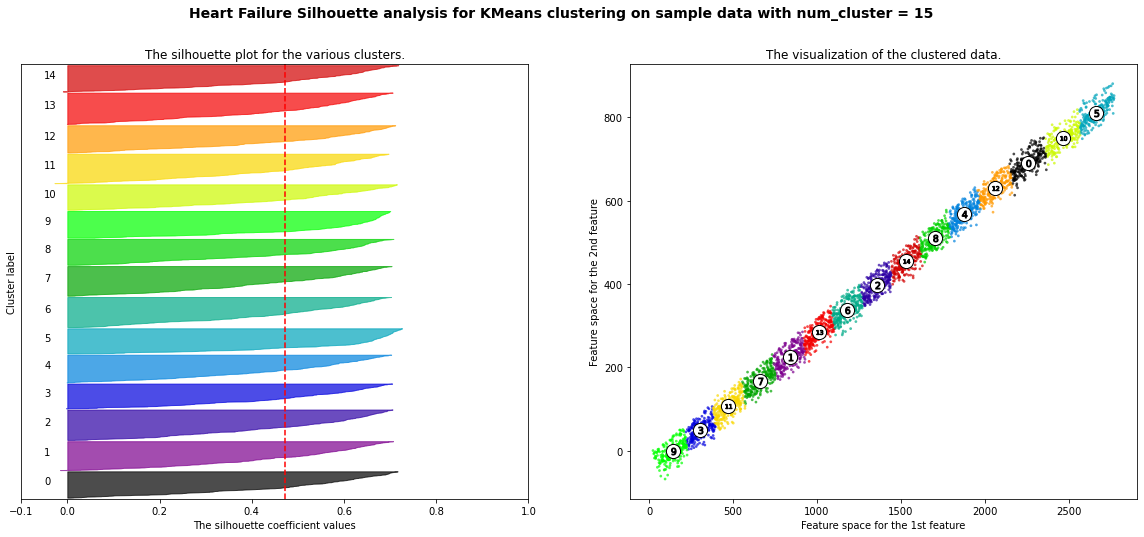

In [51]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_s_rp) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_s_rp)
    silhouette_avg = silhouette_score(best_s_rp, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_s_rp, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_s_rp[:, 0], best_s_rp[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_s_rp_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [52]:
gmm_best = GaussianMixture(n_components=2, random_state=3169)
gmm_best.fit(best_s_rp)
gmm_labels = gmm_best.predict(best_s_rp)

print('GMM BIC: ', gmm_best.bic(best_s_rp))
score_gmm = silhouette_score(best_s_rp, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_s_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_s_rp)

GMM BIC:  118930.94703739477
GMM Silhouette score:  0.6019999081866617
GMM Adjusted Mutual Information (AMI) score:  0.0018517321131929934



array([[5.46003033e-03, 9.94539970e-01],
       [5.47103570e-01, 4.52896430e-01],
       [8.70399701e-01, 1.29600299e-01],
       ...,
       [9.95558227e-01, 4.44177271e-03],
       [3.28691793e-04, 9.99671308e-01],
       [4.07611128e-04, 9.99592389e-01]])

6

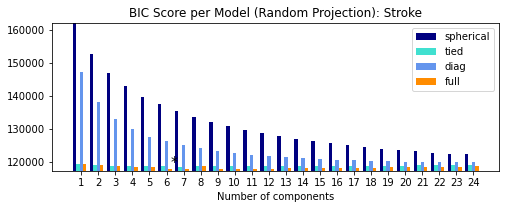

In [53]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_s_rp)
        bic.append(gmm.bic(best_s_rp))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (Random Projection): Stroke')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_s_rp.png')

best_num

# K Means and GMM on Truncated SVD

## Heart Failure

In [54]:
%store -r best_hf_tsvd

### K Means Results

In [55]:
kmeans = KMeans(n_clusters=5, random_state=3169)
kmeans.fit(best_hf_tsvd)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_hf_tsvd, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_hf_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_hf_tsvd)

K-Means Inertia:  535874.1930652295
K-Means Silhouette score:  0.3150072388221797
K-Means Adjusted Mutual Information (AMI) score:  0.07120322979215102



array([[142.98325328,  12.87700373,  95.66589609,  45.83753304,
         63.26808454],
       [ 63.21862548,  89.88527302,  34.42441565,  62.20070876,
         24.79453661],
       [152.31654684,  56.0071879 ,  99.41809012,  43.58675779,
         86.5797773 ],
       ...,
       [114.16473068,  44.77942344,  65.11558722,  25.33054394,
         42.09711174],
       [108.09148172,  64.49573773,  54.5758992 ,  13.84946798,
         50.20491259],
       [ 60.64827137, 100.32197451,  24.24641194,  62.0137801 ,
         41.44941434]])

### Inertia Analysis

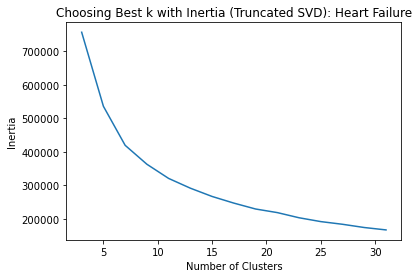

In [56]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_hf_tsvd)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (Truncated SVD): Heart Failure')
plt.savefig('inertia_hf_tsvd.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.36340602282190765
For n_clusters =  5 The average silhouette_score is : 0.31496255903824194
For n_clusters =  7 The average silhouette_score is : 0.28320963438867586
For n_clusters =  9 The average silhouette_score is : 0.26504596626239346
For n_clusters =  11 The average silhouette_score is : 0.23869162919133255
For n_clusters =  13 The average silhouette_score is : 0.23459230722867008
For n_clusters =  15 The average silhouette_score is : 0.2273397600207542


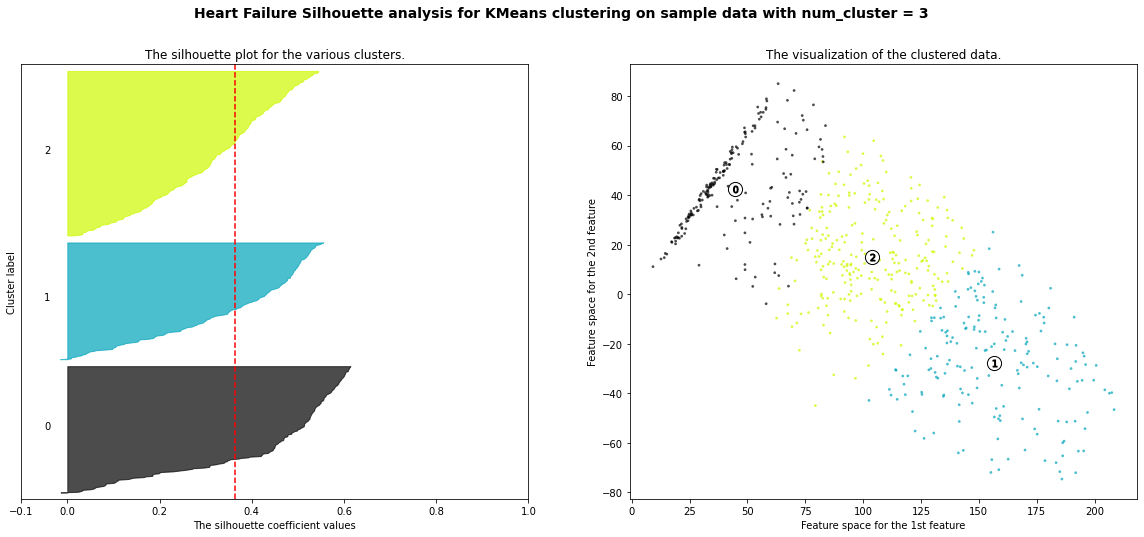

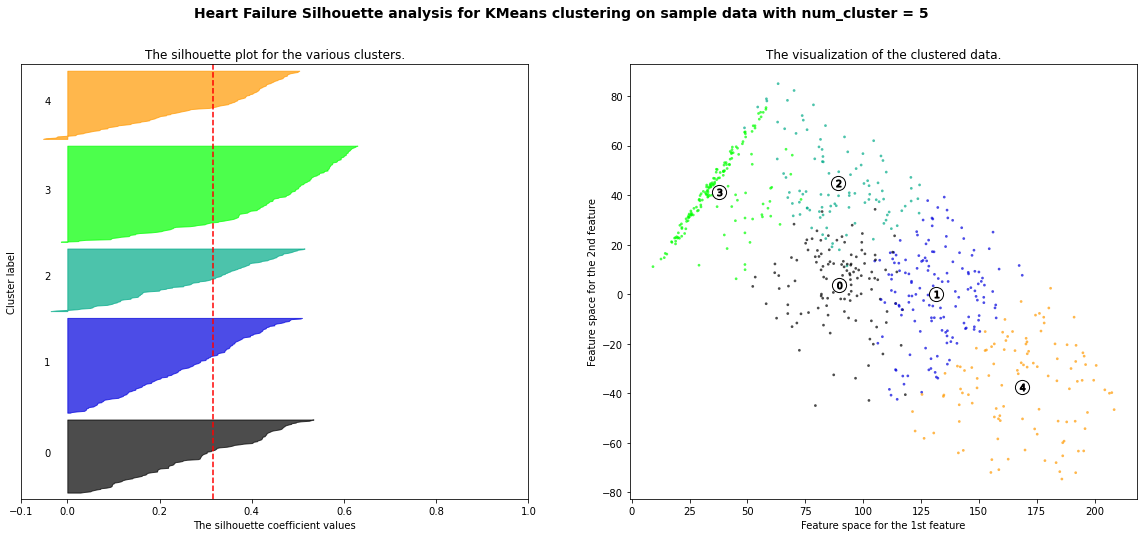

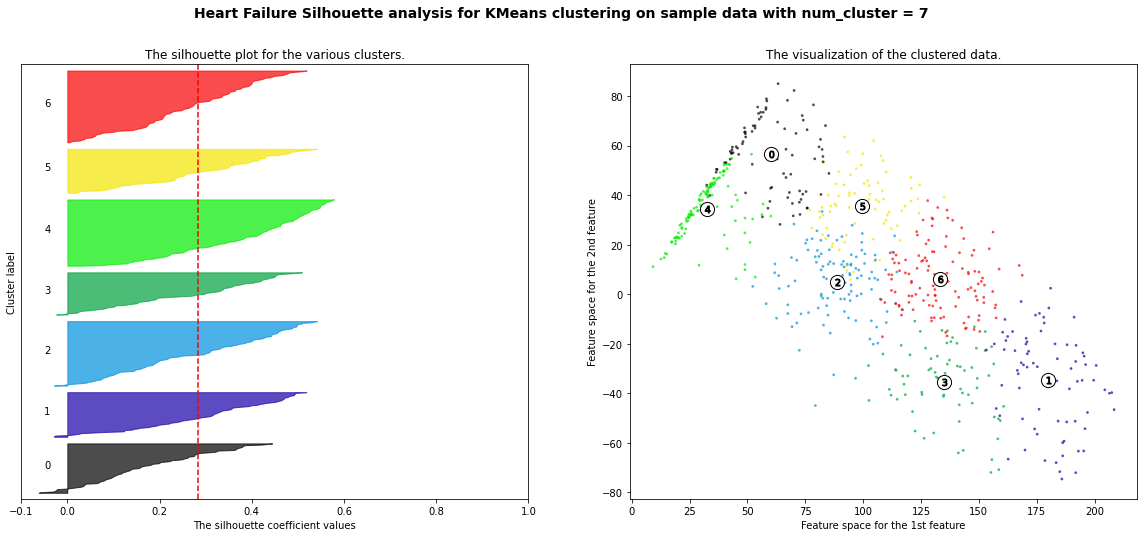

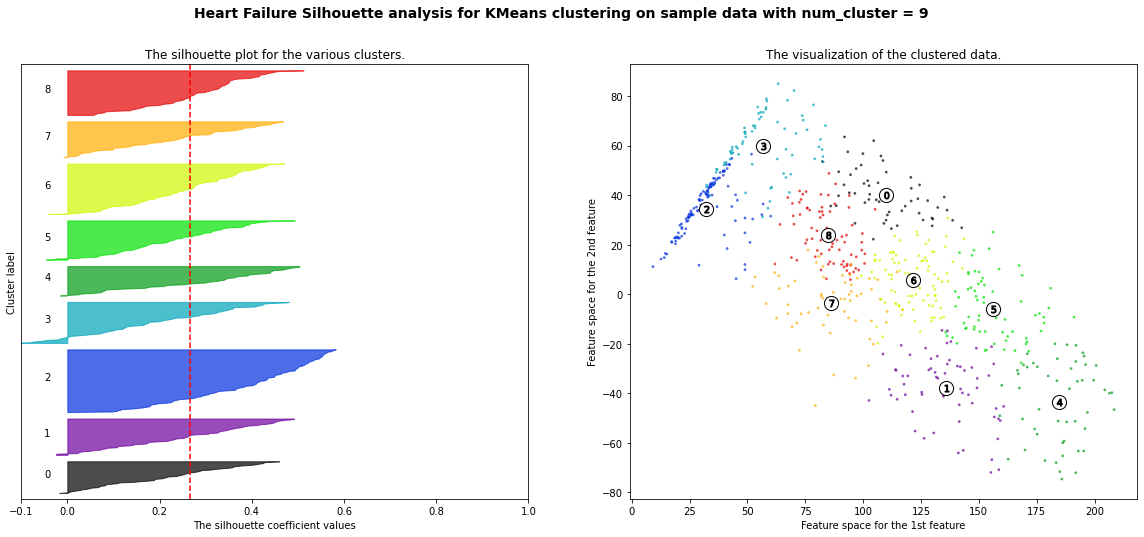

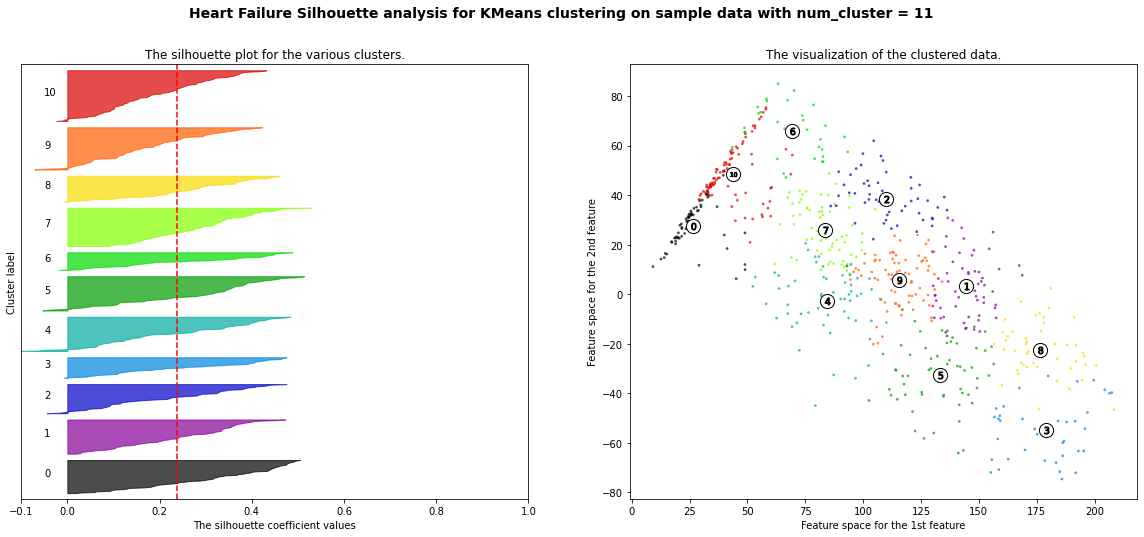

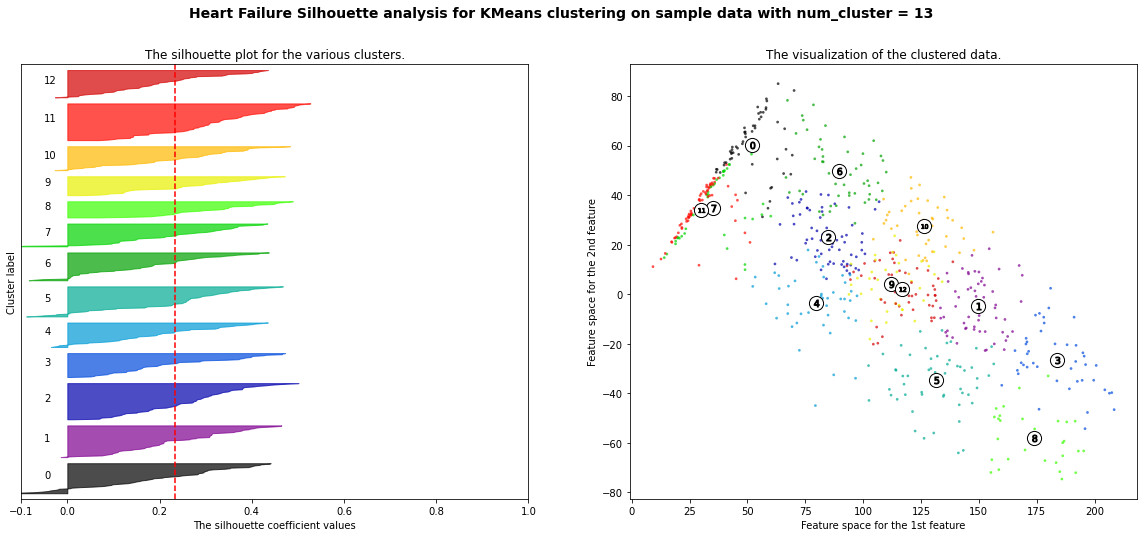

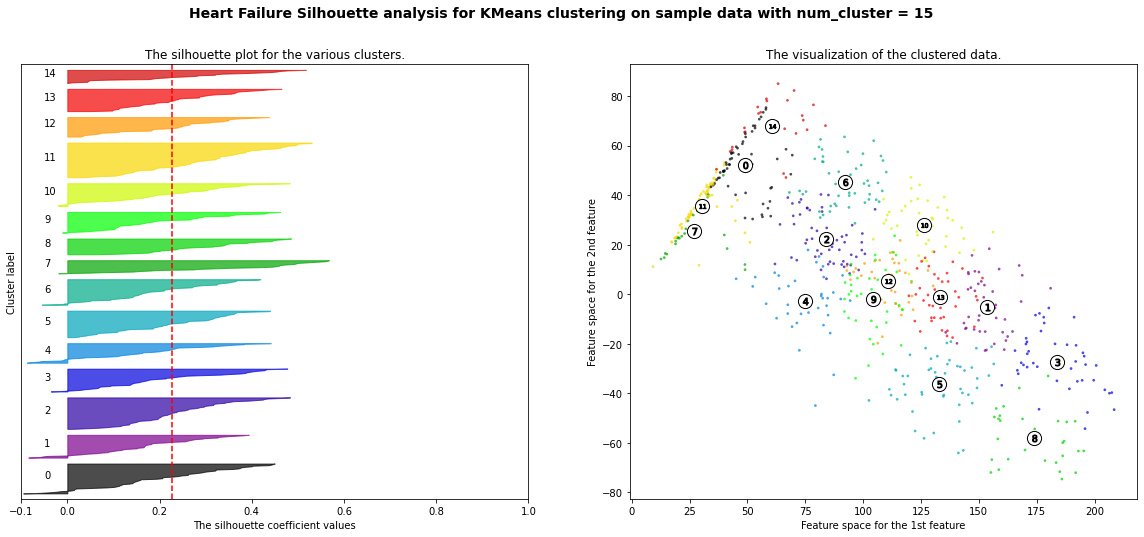

In [57]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_hf_tsvd) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_hf_tsvd)
    silhouette_avg = silhouette_score(best_hf_tsvd, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_hf_tsvd, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_hf_tsvd[:, 0], best_hf_tsvd[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_hf_tsvd_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [59]:
gmm_best = GaussianMixture(n_components=5, random_state=3169)
gmm_best.fit(best_hf_tsvd)
gmm_labels = gmm_best.predict(best_hf_tsvd)

print('GMM BIC: ', gmm_best.bic(best_hf_tsvd))
score_gmm = silhouette_score(best_hf_tsvd, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_hf_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_hf_tsvd)

GMM BIC:  21695.59483876553
GMM Silhouette score:  0.03877546524704306
GMM Adjusted Mutual Information (AMI) score:  0.17346473300661014



array([[6.11648324e-001, 0.00000000e+000, 3.81857144e-001,
        1.58585209e-138, 6.49453223e-003],
       [2.58040951e-002, 0.00000000e+000, 1.39807052e-014,
        9.71477997e-001, 2.71790745e-003],
       [1.92871318e-002, 0.00000000e+000, 5.80011531e-001,
        1.76194103e-156, 4.00701337e-001],
       ...,
       [1.16451324e-004, 0.00000000e+000, 1.88693472e-006,
        9.99713748e-001, 1.67913270e-004],
       [8.82967318e-003, 0.00000000e+000, 8.98170738e-001,
        2.56292539e-029, 9.29995891e-002],
       [3.13292888e-001, 0.00000000e+000, 3.32045970e-002,
        1.09282385e-039, 6.53502515e-001]])

3

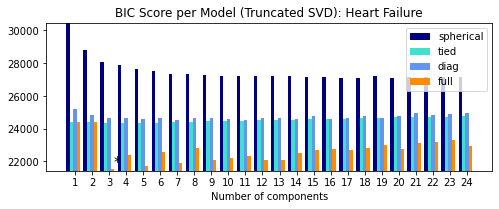

In [60]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_hf_tsvd)
        bic.append(gmm.bic(best_hf_tsvd))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (Truncated SVD): Heart Failure')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_hf_tsvd.png')

best_num

## Stroke

In [61]:
%store -r best_s_tsvd

### K Means Results

In [67]:
kmeans = KMeans(n_clusters=2, random_state=3169)
kmeans.fit(best_s_tsvd)
print('K-Means Inertia: ', kmeans.inertia_)
silh_result = silhouette_score(best_s_tsvd, kmeans.labels_)
print('K-Means Silhouette score: ', silh_result)
AMI = adjusted_mutual_info_score(Y_s_train, kmeans.labels_)
print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
print()
kmeans.fit_transform(best_s_tsvd)

K-Means Inertia:  678575325.5390552
K-Means Silhouette score:  0.6010683173354701
K-Means Adjusted Mutual Information (AMI) score:  0.0022029487125286937



array([[1616.24277664,  182.658592  ],
       [ 518.50929324,  943.83741089],
       [ 345.49728241, 1100.12734569],
       ...,
       [  89.15422954, 1477.33866802],
       [2065.85593806,  656.93058222],
       [2003.60384987,  576.3946337 ]])

### Inertia Analysis

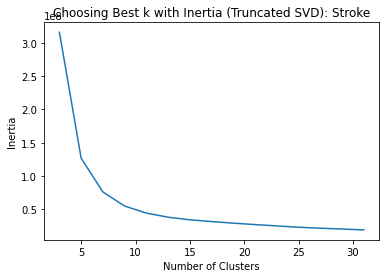

In [63]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
inertia_arr = []
for num_cluster in cluster_range:
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit(best_s_tsvd)
    inertia_arr.append(clusterer.inertia_)
inertia_arr = np.array(inertia_arr)
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],inertia_arr)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing Best k with Inertia (Truncated SVD): Stroke')
plt.savefig('inertia_s_tsvd.png')
plt.show()

### Silhouette Analysis

For n_clusters =  3 The average silhouette_score is : 0.5549516047940172
For n_clusters =  5 The average silhouette_score is : 0.5054643521267762
For n_clusters =  7 The average silhouette_score is : 0.46039263138882924
For n_clusters =  9 The average silhouette_score is : 0.42260733183750754
For n_clusters =  11 The average silhouette_score is : 0.3883946488469933
For n_clusters =  13 The average silhouette_score is : 0.35875055189593985
For n_clusters =  15 The average silhouette_score is : 0.3333658528599507


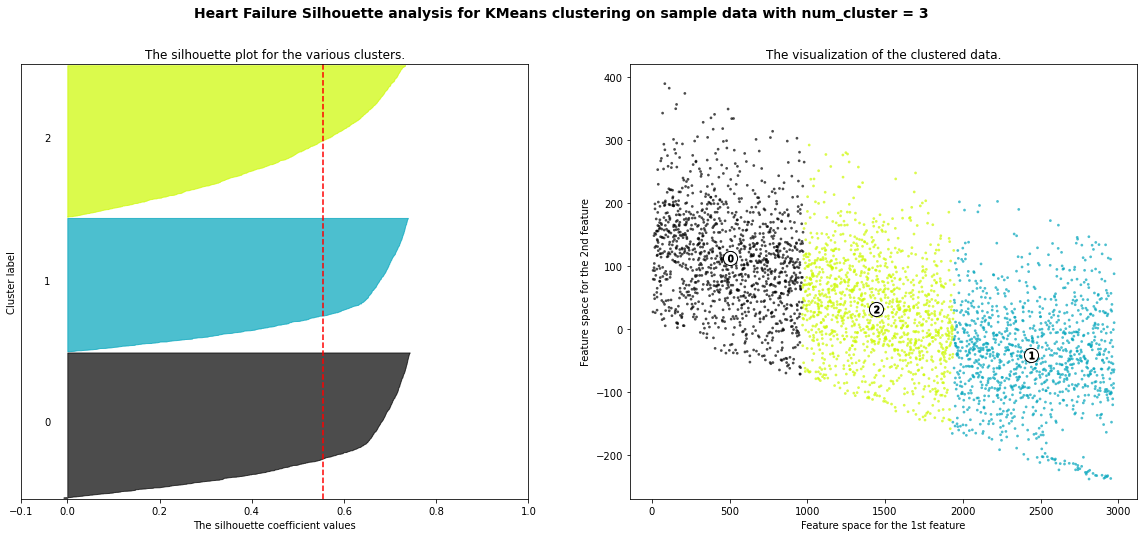

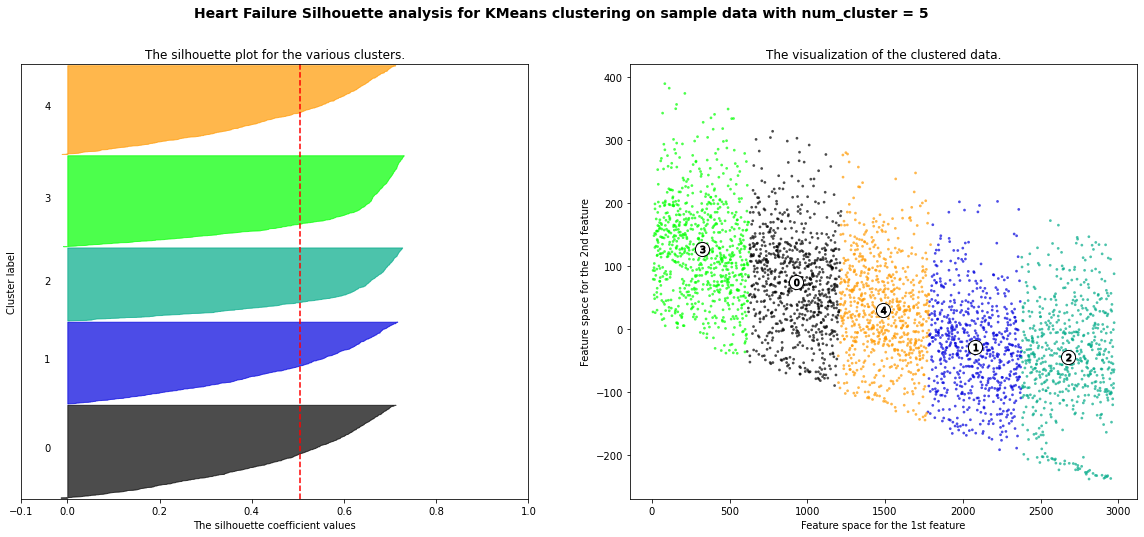

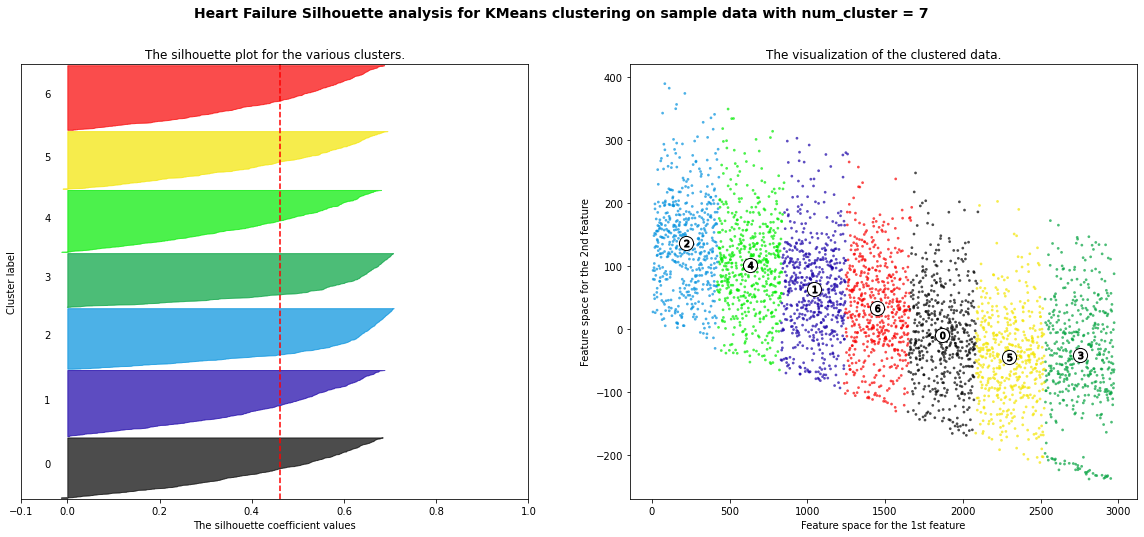

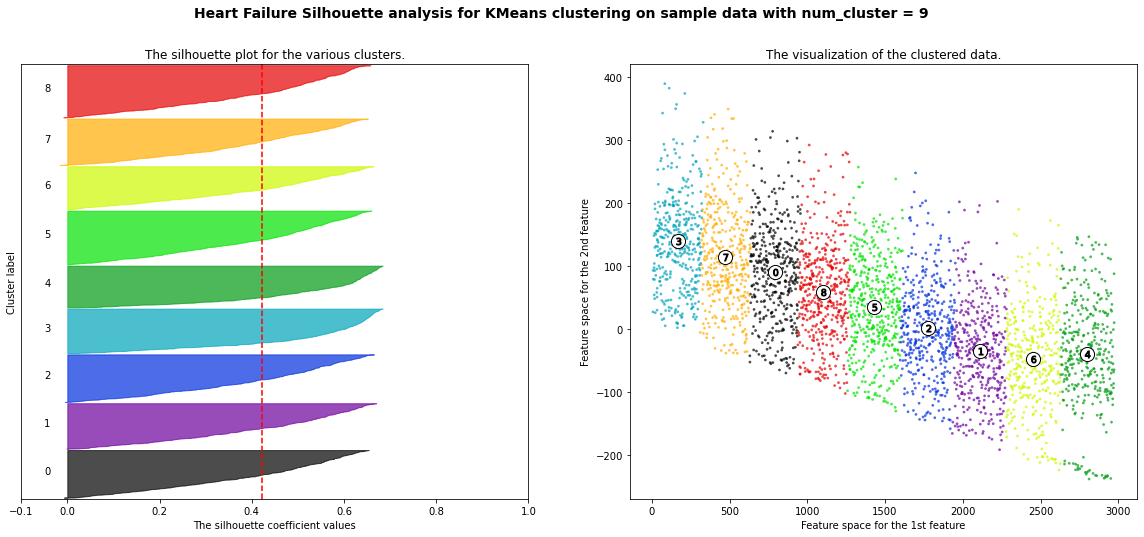

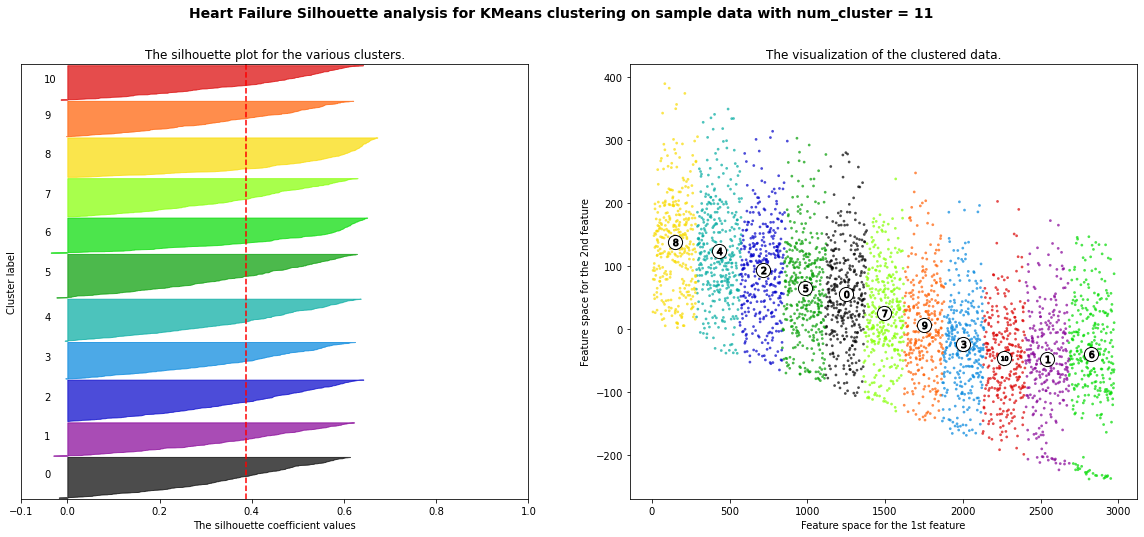

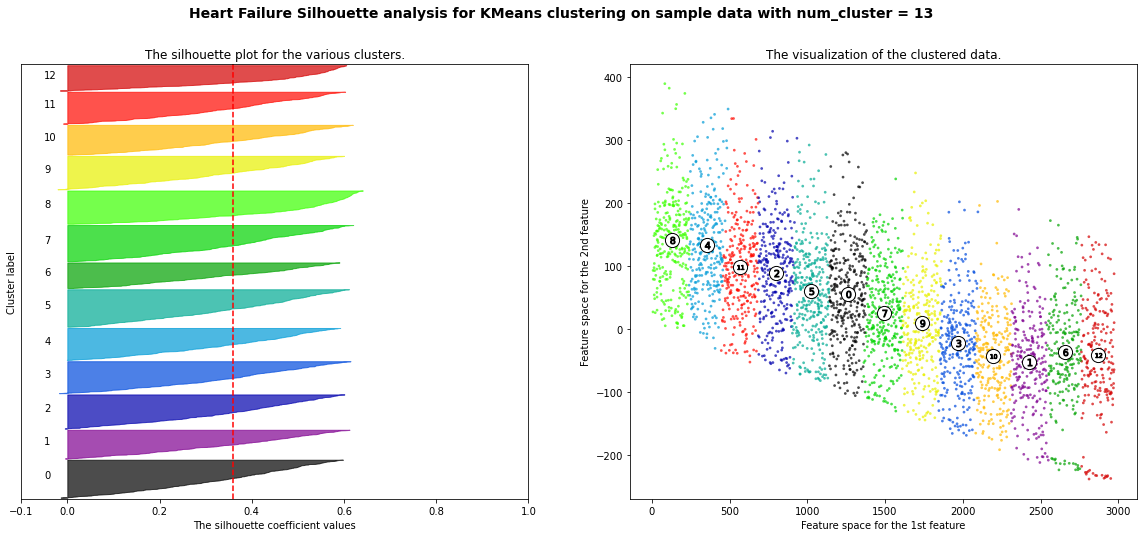

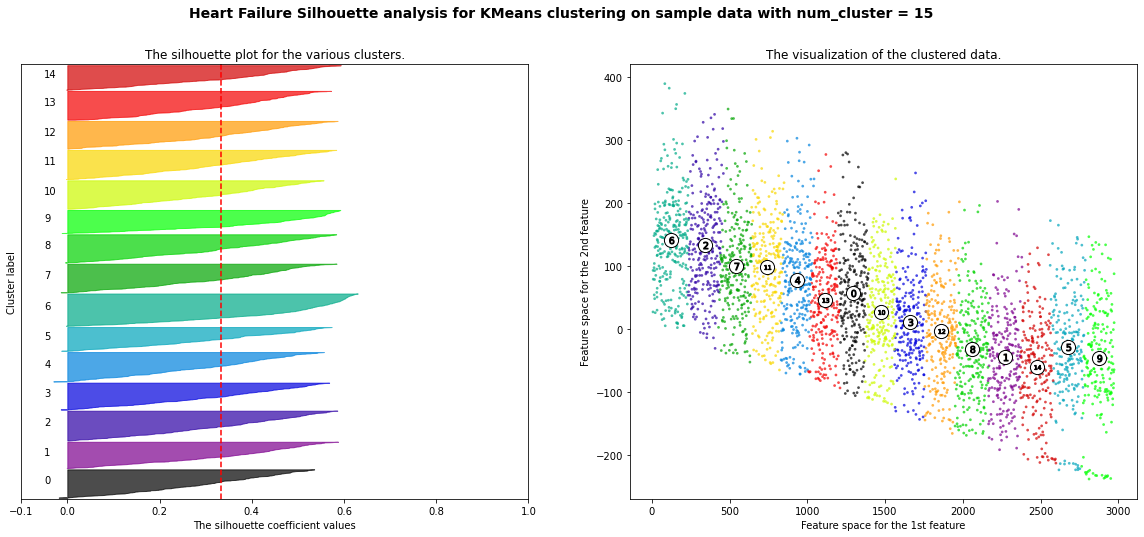

In [64]:
cluster_range = [3, 5,7,9,11,13,15]
for num_cluster in cluster_range:
    figure_to_show, (ax1, ax2) = plt.subplots(1, 2)
    figure_to_show.set_size_inches(20, 8)
   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(best_s_tsvd) + (num_cluster + 1) * 10])
    clusterer = KMeans(n_clusters=num_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(best_s_tsvd)
    silhouette_avg = silhouette_score(best_s_tsvd, cluster_labels)
    print("For n_clusters = ", num_cluster,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(best_s_tsvd, cluster_labels)

    y_lower = 10
    for i in range(num_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / num_cluster)
    ax2.scatter(best_s_tsvd[:, 0], best_s_tsvd[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Heart Failure Silhouette analysis for KMeans clustering on sample data with num_cluster = %d" % num_cluster),fontsize=14, fontweight='bold')
    plt.savefig('silhouette_s_tsvd_%d.png' % num_cluster)
plt.show()


### Gaussian Mixture Results

In [65]:
gmm_best = GaussianMixture(n_components=2, random_state=3169)
gmm_best.fit(best_s_tsvd)
gmm_labels = gmm_best.predict(best_s_tsvd)

print('GMM BIC: ', gmm_best.bic(best_s_tsvd))
score_gmm = silhouette_score(best_s_tsvd, gmm_labels)
print('GMM Silhouette score: ', score_gmm)
AMI_gmm = adjusted_mutual_info_score(Y_s_train, gmm_labels)
print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
print()
gmm_best.predict_proba(best_s_tsvd)

GMM BIC:  131341.20580789368
GMM Silhouette score:  0.5921538788746381
GMM Adjusted Mutual Information (AMI) score:  0.0017527984772630761



array([[5.27593371e-03, 9.94724066e-01],
       [5.15072226e-01, 4.84927774e-01],
       [8.62539128e-01, 1.37460872e-01],
       ...,
       [9.95110843e-01, 4.88915658e-03],
       [3.03894397e-04, 9.99696106e-01],
       [3.93600833e-04, 9.99606399e-01]])

17

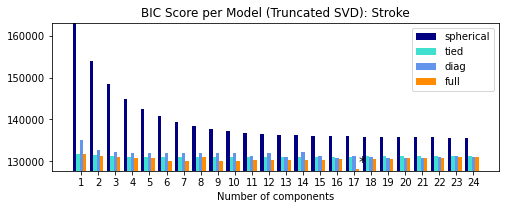

In [66]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 25)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type, max_iter=1000)
        gmm.fit(best_s_tsvd)
        bic.append(gmm.bic(best_s_tsvd))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
clf = best_gmm
bars = []
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC Score per Model (Truncated SVD): Stroke')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.savefig('GMM_s_tsvd.png')

best_num